#  Perform Principal component analysis and perform clustering using first 3 principal component scores (both heirarchial and k mean clustering (scree plot or elbow curve) and obtain optimum number of clusters and check whether we have obtained same number of clusters with the original data

In [1]:
!pip install yellowbrick


In [2]:
# Importing the required libraries for the data set

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.cm as cm
import scipy.cluster.hierarchy as sch

from tqdm import tqdm
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans,AgglomerativeClustering,DBSCAN
from sklearn.manifold import TSNE
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.preprocessing import MinMaxScaler,StandardScaler 
from yellowbrick.cluster import KElbowVisualizer
from sklearn.metrics import silhouette_score as sil,calinski_harabasz_score as chs, silhouette_samples

import warnings
warnings.filterwarnings("ignore")


In [3]:
# Read the dataset

wine=pd.read_csv("wine.csv")

In [4]:
wine

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,3,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740
174,3,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750
175,3,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835
176,3,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840


In [5]:
wine.head()

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [6]:
wine.tail()

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
173,3,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.7,0.64,1.74,740
174,3,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.3,0.70,1.56,750
175,3,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.2,0.59,1.56,835
176,3,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.3,0.60,1.62,840
177,3,14.13,4.10,2.74,24.5,96,2.05,0.76,0.56,1.35,9.2,0.61,1.60,560


In [7]:
wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Type             178 non-null    int64  
 1   Alcohol          178 non-null    float64
 2   Malic            178 non-null    float64
 3   Ash              178 non-null    float64
 4   Alcalinity       178 non-null    float64
 5   Magnesium        178 non-null    int64  
 6   Phenols          178 non-null    float64
 7   Flavanoids       178 non-null    float64
 8   Nonflavanoids    178 non-null    float64
 9   Proanthocyanins  178 non-null    float64
 10  Color            178 non-null    float64
 11  Hue              178 non-null    float64
 12  Dilution         178 non-null    float64
 13  Proline          178 non-null    int64  
dtypes: float64(11), int64(3)
memory usage: 19.6 KB


In [8]:
wine.size

2492

In [9]:
wine.describe()

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,1.938202,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.775035,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,1.000000,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,1.000000,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,2.000000,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,3.000000,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,3.000000,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


In [10]:
wine.Type.unique()

array([1, 2, 3], dtype=int64)

In [11]:
wine.Type.value_counts()

Type
2    71
1    59
3    48
Name: count, dtype: int64

In [12]:
wine["ID"]=range(1,179,1)
wine

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline,ID
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,1
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,2
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,3
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,4
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,3,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740,174
174,3,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750,175
175,3,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835,176
176,3,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840,177


In [13]:
wine.describe()

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline,ID
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,1.938202,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258,89.500000
std,0.775035,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474,51.528309
min,1.000000,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000,1.000000
25%,1.000000,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000,45.250000
50%,2.000000,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000,89.500000
75%,3.000000,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000,133.750000
max,3.000000,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000,178.000000


In [14]:
wine.isnull().sum()

Type               0
Alcohol            0
Malic              0
Ash                0
Alcalinity         0
Magnesium          0
Phenols            0
Flavanoids         0
Nonflavanoids      0
Proanthocyanins    0
Color              0
Hue                0
Dilution           0
Proline            0
ID                 0
dtype: int64

In [15]:
wine.skew()

Type               0.107431
Alcohol           -0.051482
Malic              1.039651
Ash               -0.176699
Alcalinity         0.213047
Magnesium          1.098191
Phenols            0.086639
Flavanoids         0.025344
Nonflavanoids      0.450151
Proanthocyanins    0.517137
Color              0.868585
Hue                0.021091
Dilution          -0.307285
Proline            0.767822
ID                 0.000000
dtype: float64

#  Exploratory Data Analysis

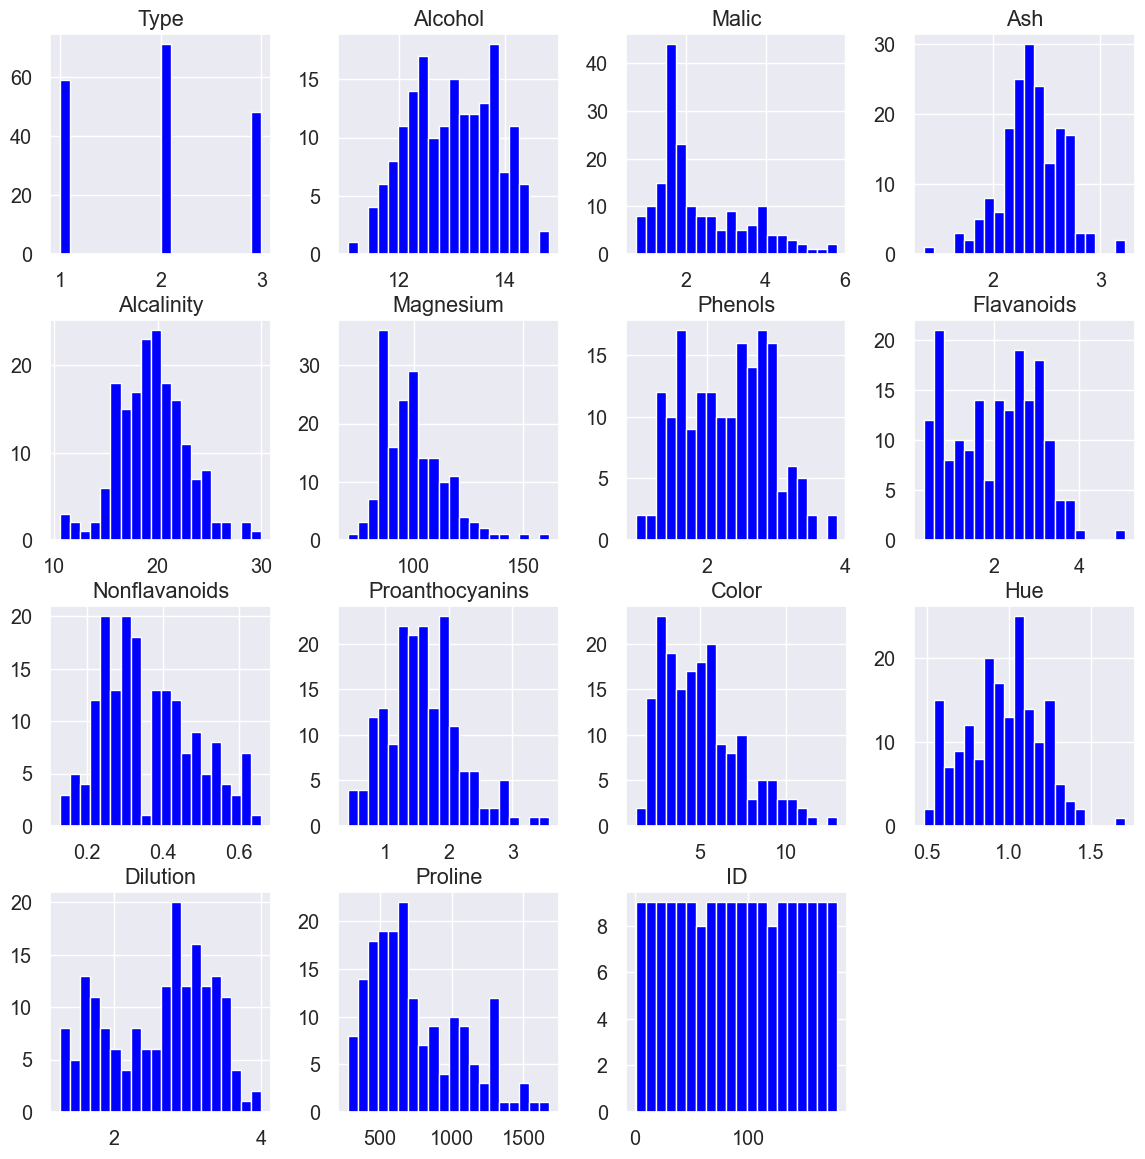

In [16]:
sns.set(style="dark",font_scale=1.3,rc={"figure.figsize":(14,14)})
ax=wine.hist(bins=20,color="blue")

#  Outliers Detection

In [17]:
wine.columns

Index(['Type', 'Alcohol', 'Malic', 'Ash', 'Alcalinity', 'Magnesium', 'Phenols',
       'Flavanoids', 'Nonflavanoids', 'Proanthocyanins', 'Color', 'Hue',
       'Dilution', 'Proline', 'ID'],
      dtype='object')

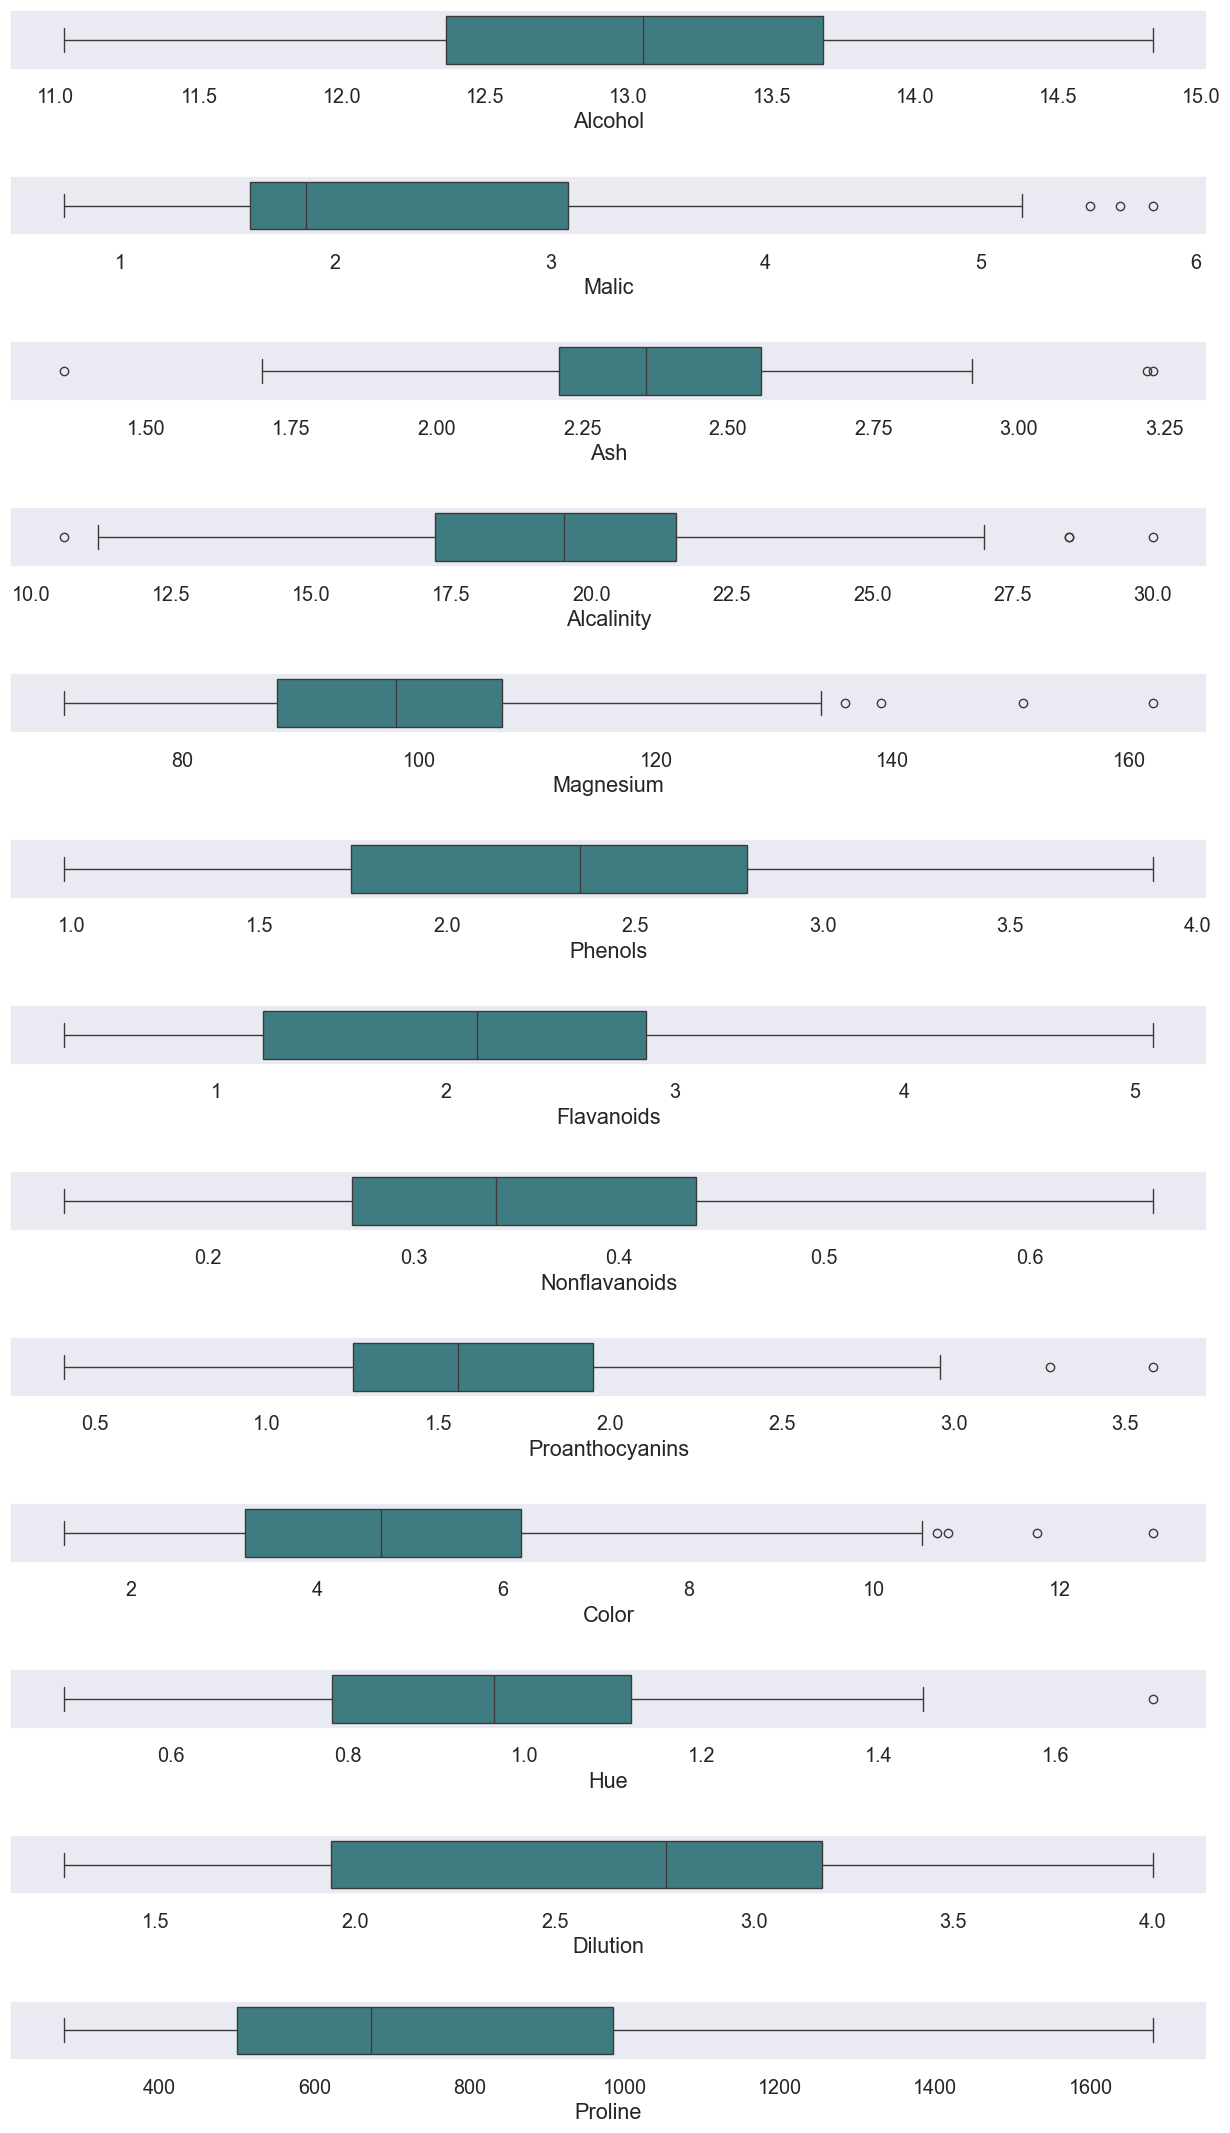

In [18]:
outlier=wine.copy()
fig,axes=plt.subplots(13,1,figsize=(13,22),sharex=False,sharey=False)
sns.boxplot(x="Alcohol",data=outlier,palette="crest",ax=axes[0])
sns.boxplot(x="Malic",data=outlier,palette="crest",ax=axes[1])
sns.boxplot(x="Ash",data=outlier,palette="crest",ax=axes[2])
sns.boxplot(x="Alcalinity",data=outlier,palette="crest",ax=axes[3])
sns.boxplot(x="Magnesium",data=outlier,palette="crest",ax=axes[4])
sns.boxplot(x="Phenols",data=outlier,palette="crest",ax=axes[5])
sns.boxplot(x="Flavanoids",data=outlier,palette="crest",ax=axes[6])
sns.boxplot(x="Nonflavanoids",data=outlier,palette="crest",ax=axes[7])
sns.boxplot(x="Proanthocyanins",data=outlier,palette="crest",ax=axes[8])
sns.boxplot(x="Color",data=outlier,palette="crest",ax=axes[9])
sns.boxplot(x="Hue",data=outlier,palette="crest",ax=axes[10])
sns.boxplot(x="Dilution",data=outlier,palette="crest",ax=axes[11])
sns.boxplot(x="Proline",data=outlier,palette="crest",ax=axes[12])
plt.tight_layout(pad=2.0)


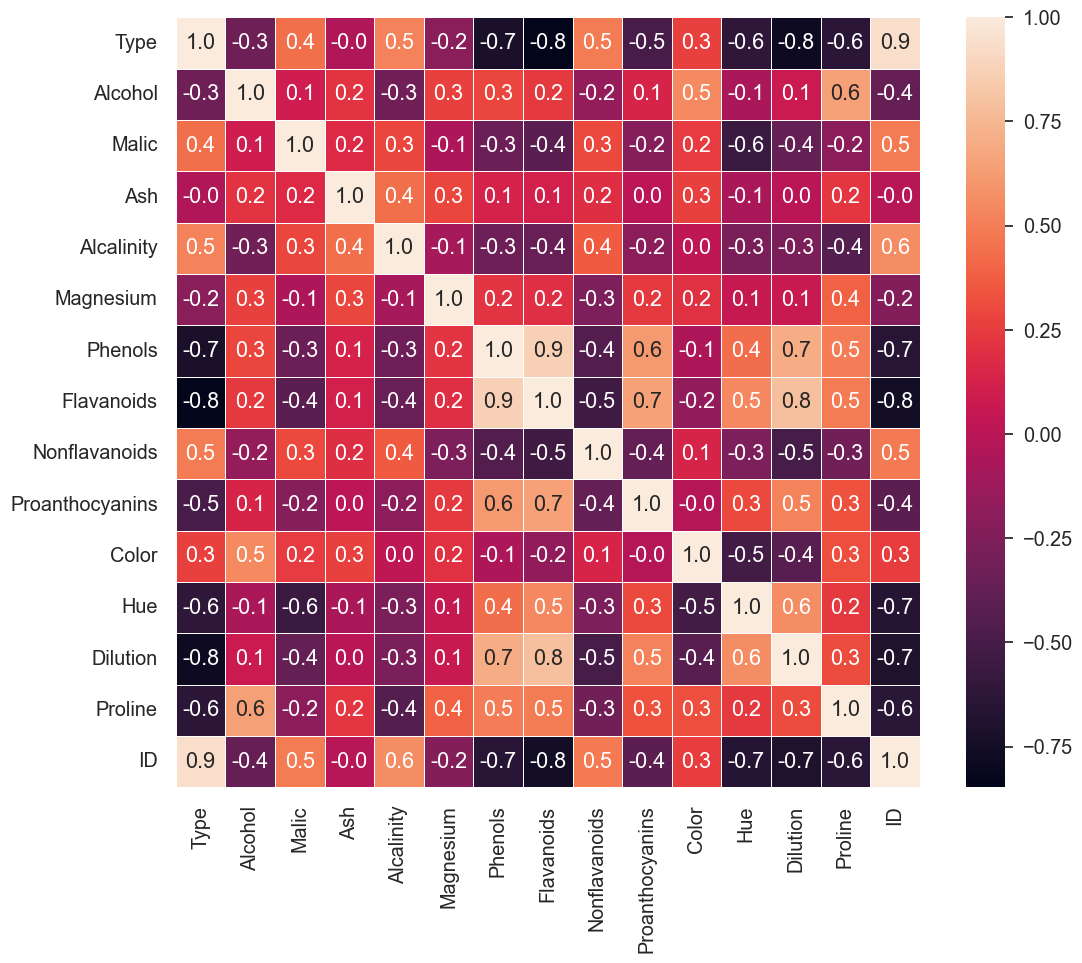

In [19]:
# Generating the Heatmap

f,ax = plt.subplots(figsize=(12,10))
sns.heatmap(wine.corr(), annot=True, linewidths =.5, fmt ='.1f',ax=ax)
plt.show()

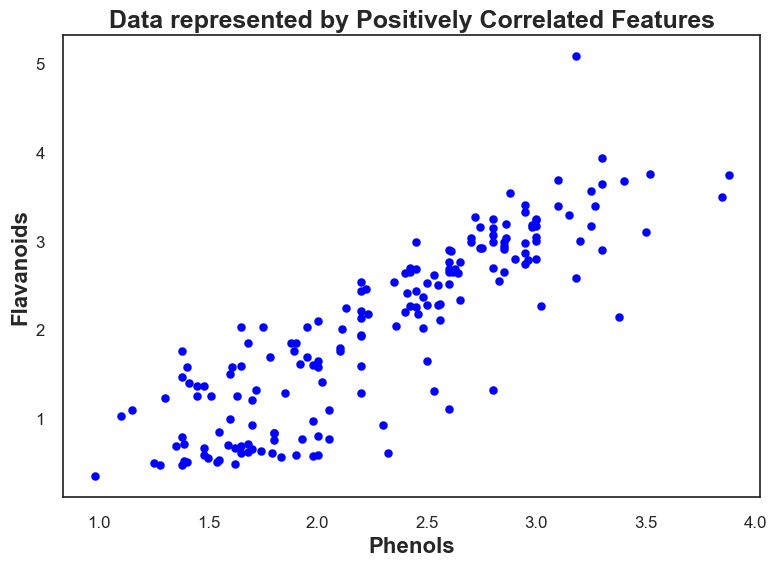

In [20]:
# Plotting frequent flying Phenols vs. Flavanoids

sns.set(style="white",rc={"figure.figsize":(9,6)},font_scale=1.1)

plt.scatter(x=wine["Phenols"],y=wine["Flavanoids"],color="blue",lw=0.1)
plt.xlabel("Phenols",fontweight="bold",fontsize=16)
plt.ylabel("Flavanoids",fontweight="bold",fontsize=16)
plt.title("Data represented by Positively Correlated Features",fontweight='bold',fontsize=18)
plt.show()

#  Data Preprocessing

In [21]:
wine.head()

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline,ID
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,1
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,2
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,3
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,4
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,5


In [22]:
wine_df=wine.set_index("ID")
wine_df

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
ID,,,,,,,,,,,,,,
1,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
2,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
3,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
4,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
5,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
174,3,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740
175,3,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750
176,3,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835


In [23]:
wine_df.head()

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
ID,,,,,,,,,,,,,,
1,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
2,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
3,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
4,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
5,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [24]:
# Applying Standard Scaler on the Data

standard_scaler=StandardScaler()
std_wine=standard_scaler.fit_transform(wine)
std_wine.shape

(178, 15)

In [25]:
# Applying MinMax Scaler on Dataset

minmax=MinMaxScaler()

norm_wine=minmax.fit_transform(wine)
norm_wine.shape

(178, 15)

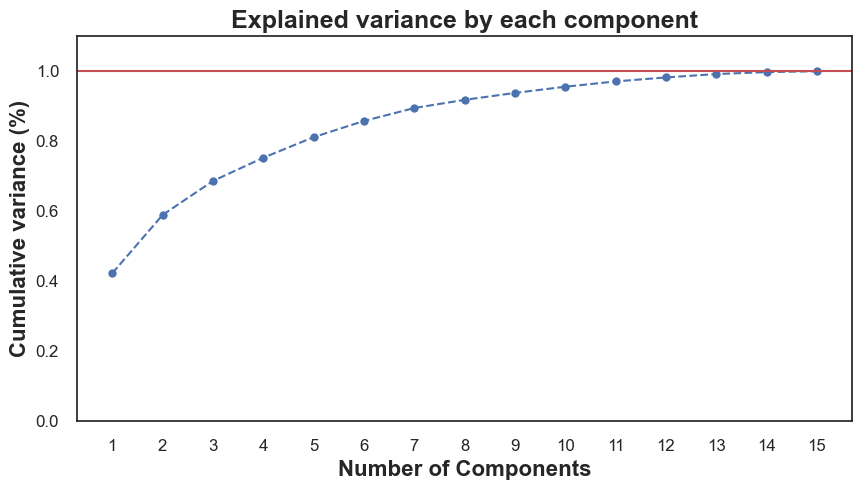

In [26]:
# PCA on Standard Scaled Dataset

pca_var=PCA()
pca_var.fit(std_wine)

#plot

plt.figure(figsize=(10,5))
xi=np.arange(1,1+std_wine.shape[1],step=1)
yi=np.cumsum(pca_var.explained_variance_ratio_)
plt.plot(xi,yi,marker="o",linestyle="--",color="b")

# Aesthetics

plt.ylim(0.0,1.1)
plt.xlabel("Number of Components",fontweight="bold",fontsize=16)
plt.xticks(np.arange(1,1+std_wine.shape[1],step=1))
plt.ylabel("Cumulative variance (%)",fontweight="bold",fontsize=16)
plt.title("Explained variance by each component",fontweight="bold",fontsize=18)
plt.axhline(y=1,color="r",linestyle="-")
plt.gca().xaxis.grid(False)


In [27]:
# The amount of variance that each PCA explains is

var=pca_var.explained_variance_ratio_
var

array([0.42315618, 0.16647321, 0.09699353, 0.06632946, 0.05877432,
       0.04624981, 0.03695786, 0.0233517 , 0.01982763, 0.01765908,
       0.0151364 , 0.01143312, 0.00964268, 0.00560632, 0.0024087 ])

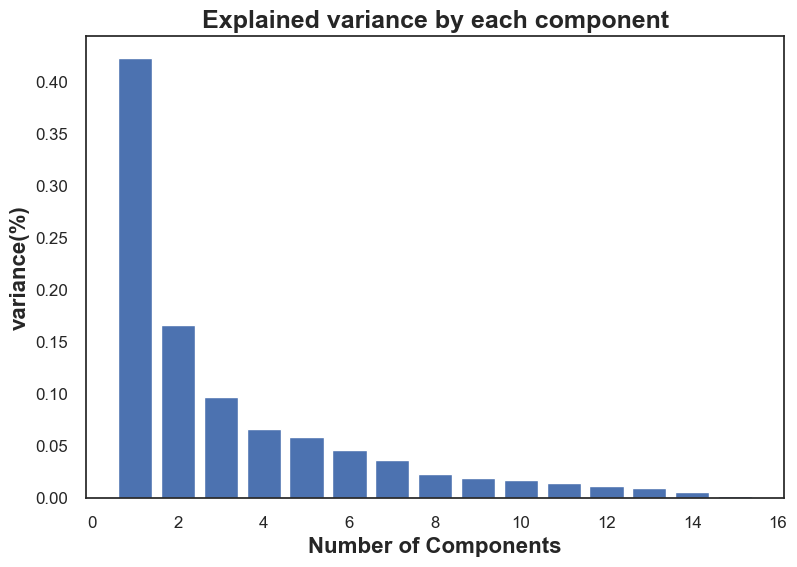

In [28]:
plt.bar(range(1,len(var)+1),var)
plt.xlabel("Number of Components",fontweight="bold",fontsize=16)
plt.ylabel("variance(%)",fontweight="bold",fontsize=16)
plt.title("Explained variance by each component",fontweight="bold",fontsize=18)
plt.show()

#  Cumulative Variance

In [29]:
var1=np.cumsum(np.round(var,decimals=4)*100)
var1

array([ 42.32,  58.97,  68.67,  75.3 ,  81.18,  85.8 ,  89.5 ,  91.84,
        93.82,  95.59,  97.1 ,  98.24,  99.2 ,  99.76, 100.  ])

In [30]:
pca = PCA(n_components=3)
pca_std = pca.fit_transform(std_wine)

# Convert to data frame
pca_std_wine = pd.DataFrame(data = pca_std, columns = ['PC1', 'PC2','PC3'])

# Shape and preview
print(pca_std_wine.shape)
pca_std_wine.head()


(178, 3)


,PC1,PC2,PC3
0,3.906276,-1.454982,-0.155368
1,3.005931,0.330906,-2.079463
2,3.187606,-1.038081,0.978714
3,4.245701,-2.771261,-0.126183
4,1.904549,-0.866149,1.917434


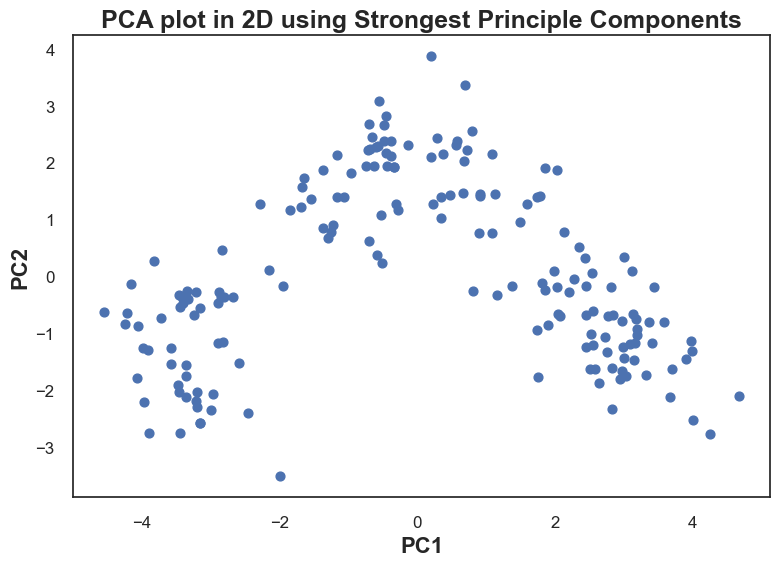

In [31]:
# PCA plot in 2D

plt.figure(figsize=(9,6))

#Scatterplot
plt.scatter(pca_std_wine.iloc[:,0],pca_std_wine.iloc[:,1],s=40)

# Aesthetics

plt.title("PCA plot in 2D using Strongest Principle Components",fontweight="bold",fontsize=18)
plt.xlabel("PC1",fontweight="bold",fontsize=16)
plt.ylabel("PC2",fontweight="bold",fontsize=16)
plt.show()

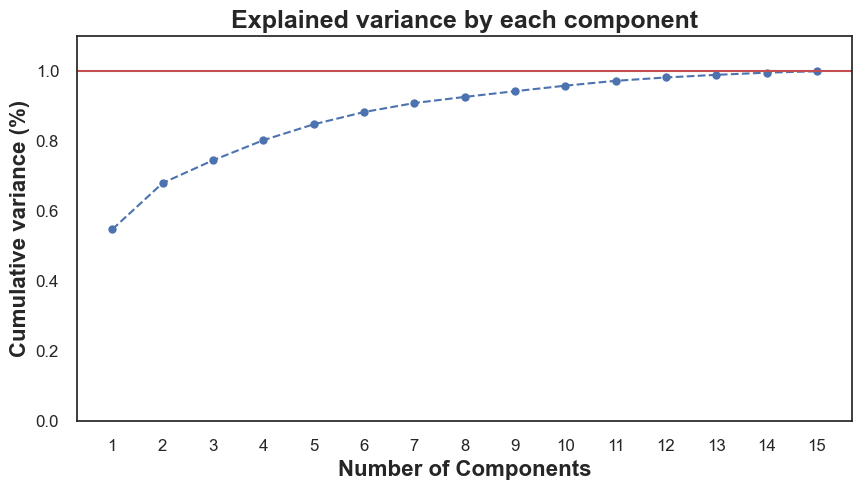

In [32]:
# PCA on MinMax Scaled Dataset

pca_var=PCA()
pca_var.fit(norm_wine)

# Plot

plt.figure(figsize=(10,5))
xi=np.arange(1,1+norm_wine.shape[1],step=1)
yi=np.cumsum(pca_var.explained_variance_ratio_)
plt.plot(xi,yi,marker="o",linestyle="--",color="b")

# Aesthetics

plt.ylim(0.0,1.1)
plt.xlabel("Number of Components",fontweight="bold",fontsize=16)
plt.xticks(np.arange(1,1+norm_wine.shape[1],step=1))
plt.ylabel("Cumulative variance (%)",fontweight="bold",fontsize=16)
plt.title('Explained variance by each component',fontweight='bold',fontsize=18)
plt.axhline(y=1,color="r",linestyle="-")
plt.gca().xaxis.grid(False)


In [33]:
# The amount of variance that each PCA explains is

var=pca_var.explained_variance_ratio_
var

array([0.54830941, 0.13241097, 0.06480939, 0.0574237 , 0.04538901,
       0.0350859 , 0.02569862, 0.01752812, 0.01631456, 0.01577557,
       0.01391124, 0.00958205, 0.00746694, 0.00626671, 0.00402782])

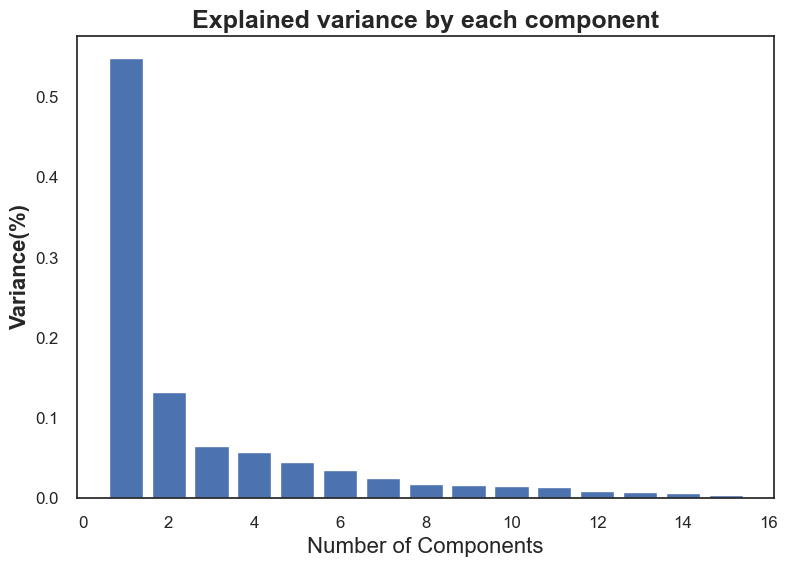

In [34]:
plt.bar(range(1,len(var)+1),var)
plt.xlabel("Number of Components",fontsize=16)
plt.ylabel("Variance(%)",fontweight="bold",fontsize=16)
plt.title("Explained variance by each component",fontweight="bold",fontsize=18)
plt.show()

In [35]:
# Cumulative Variance

var1=np.cumsum(np.round(var,decimals=4)*100)
var1

array([ 54.83,  68.07,  74.55,  80.29,  84.83,  88.34,  90.91,  92.66,
        94.29,  95.87,  97.26,  98.22,  98.97,  99.6 , 100.  ])

In [36]:
pca=PCA(n_components=3)
pca_norm=pca.fit_transform(norm_wine)

# Convert to DataFrame
pca_norm_wine=pd.DataFrame(data=pca_norm,columns=["PC1","PC2","PC3"])

# Shape and preview

print(pca_norm_wine.shape)
pca_norm_wine.head()


(178, 3)


,PC1,PC2,PC3
0,-0.979144,-0.241592,0.032566
1,-0.827752,-0.009548,-0.291197
2,-0.838919,-0.183929,0.127351
3,-1.050659,-0.561901,0.160457
4,-0.613267,-0.068768,0.051951


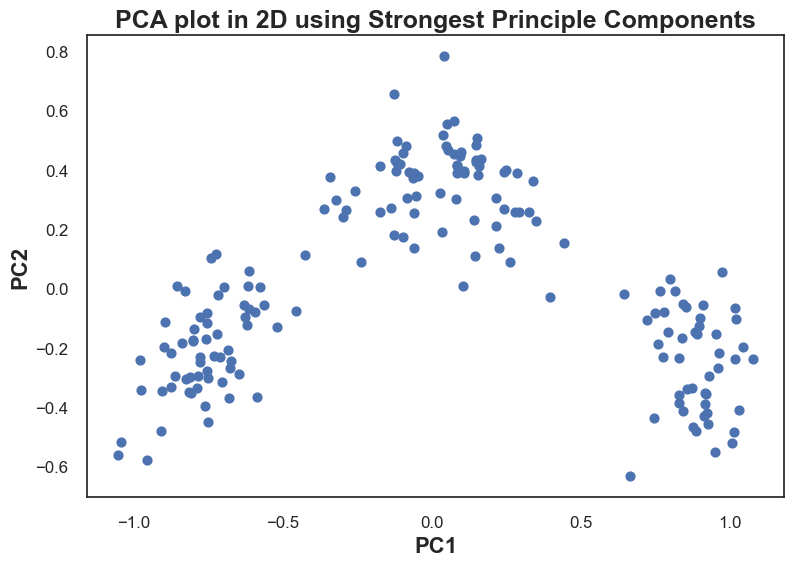

<Figure size 900x600 with 0 Axes>

<Figure size 900x600 with 0 Axes>

In [37]:
 # PCA plot in 2D

plt.figure(figsize=(9,6))
plt.scatter(pca_norm_wine.iloc[:,0], pca_norm_wine.iloc[:,1], s=40)

plt.title('PCA plot in 2D using Strongest Principle Components',fontweight='bold',fontsize=18)
plt.xlabel('PC1',fontweight='bold', fontsize=16)
plt.ylabel('PC2',fontweight='bold', fontsize=16)
plt.show()

plt.figure(figsize=(9,6))


In [38]:
# KMeans Clustering

inertia=[]
for i in tqdm(range(2,10)):
    kmeans=KMeans(n_clusters=i,init="k-means++",n_init=15,max_iter=500,random_state=17)
    kmeans.fit(pca_std_wine)
    inertia.append(kmeans.inertia_)

100%|██████████| 8/8 [00:11<00:00,  1.39s/it]


In [39]:
    
silhouette={}
for i in tqdm(range(2,10)):
    kmeans=KMeans(n_clusters=i,init="k-means++",n_init=15,max_iter=500,random_state=17)
    kmeans.fit(pca_std_wine)
    silhouette[i]=sil(pca_std_wine,kmeans.labels_,metric="euclidean")
    

100%|██████████| 8/8 [00:10<00:00,  1.36s/it]


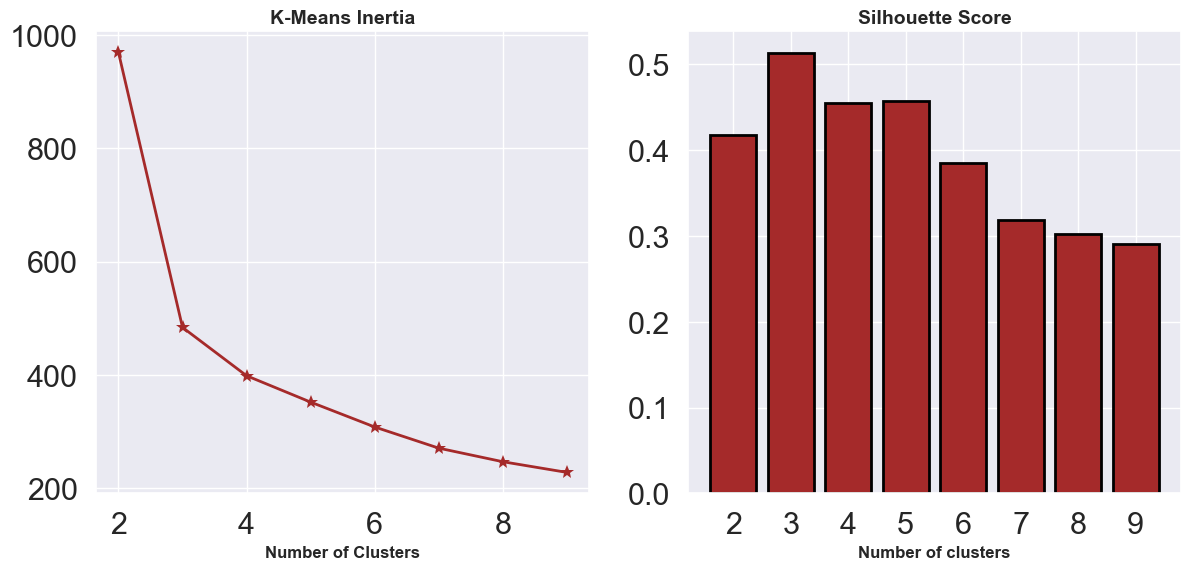

In [40]:
sns.set(style="darkgrid",rc={"figure.figsize":(14,6)},font_scale=2)

plt.subplot(1,2,1)
plt.plot(range(2,len(inertia)+2),inertia,marker="*",lw=2,color="brown",ms=10)
plt.xlabel("Number of Clusters",fontweight="bold",fontsize=12)
plt.title("K-Means Inertia",fontweight="bold",fontsize=14)

plt.subplot(1,2,2)
plt.bar(range(len(silhouette)),list(silhouette.values()),align="center",edgecolor="black",lw=2,color="brown")
plt.xticks(range(len(silhouette)),list(silhouette.keys()))
plt.xlabel("Number of clusters",fontweight="bold",fontsize=12)
plt.title("Silhouette Score",fontweight="bold",fontsize=14)
plt.show()

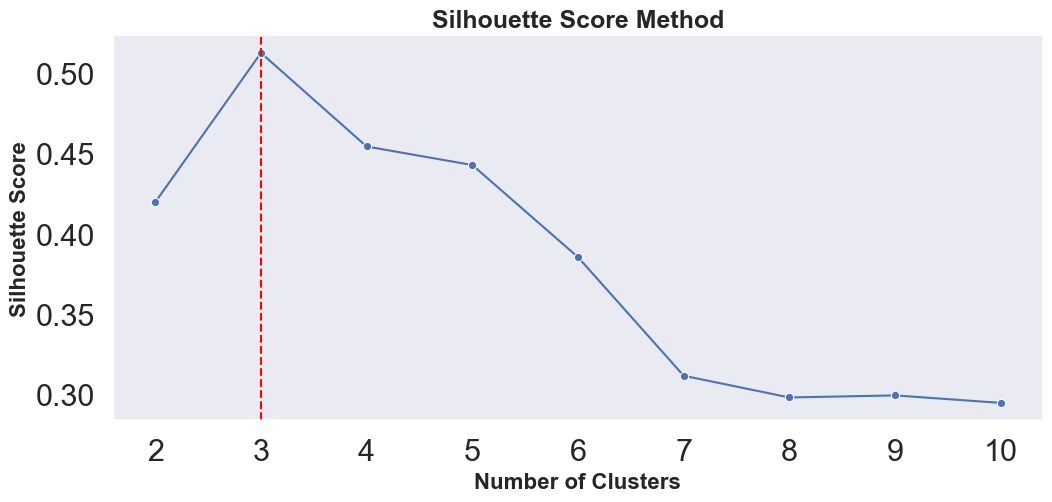

In [41]:
# Silhouette Score

from sklearn.metrics import silhouette_score

n_clusters = [2, 3, 4, 5, 6, 7, 8, 9, 10]  # number of clusters
clusters_inertia = []  # inertia of clusters
s_scores = []  # silhouette scores

for n in n_clusters:
    KM_est = KMeans(n_clusters=n, init='k-means++').fit(pca_std_wine)
    clusters_inertia.append(KM_est.inertia_)  # data for the elbow method
    silhouette_avg = silhouette_score(pca_std_wine, KM_est.labels_)
    s_scores.append(silhouette_avg)  # data for the silhouette score method

# Creating a DataFrame for Seaborn

data = {'Number of Clusters': n_clusters, 'Silhouette Score': s_scores}
df = pd.DataFrame(data)

fig, ax = plt.subplots(figsize=(12, 5))
ax = sns.lineplot(x='Number of Clusters', y='Silhouette Score', marker='o', data=df, ax=ax)
ax.set_title("Silhouette Score Method", fontweight='bold', fontsize=18)
ax.set_xlabel("Number of Clusters", fontweight='bold', fontsize=16)
ax.set_ylabel("Silhouette Score", fontweight='bold', fontsize=16)
ax.axvline(3, ls="--", c="red")
plt.grid()
plt.show()

Elbow plot for Standard Scaler data


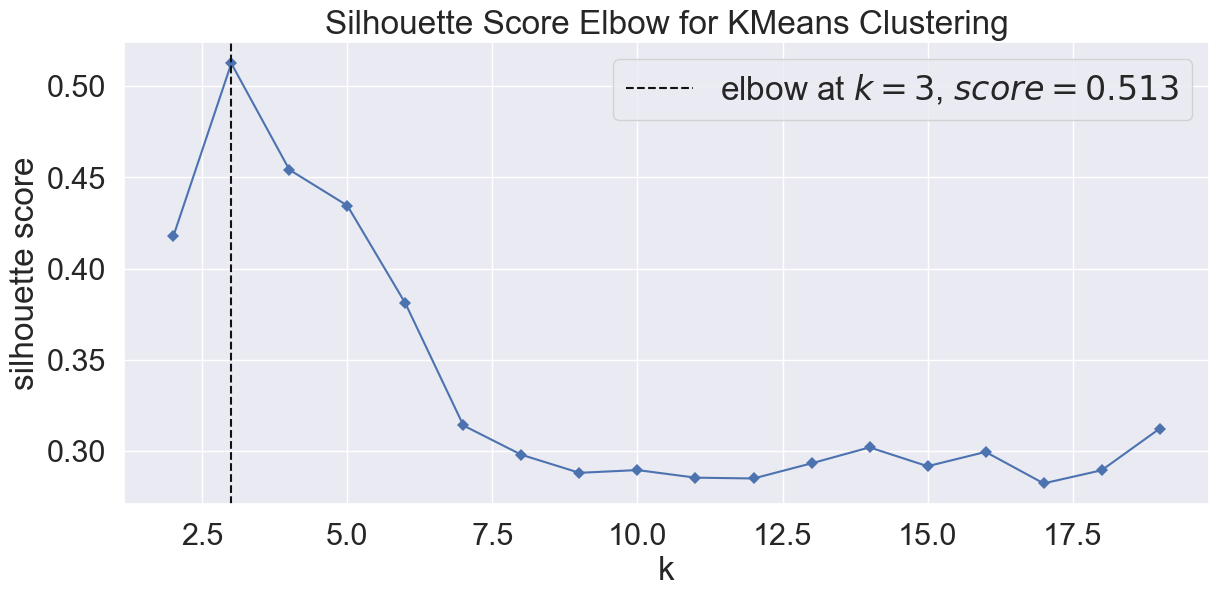

In [42]:
# Instantiate a scikit-learn K-Means model. we will check for two diff hyperparameters value effect

model=KMeans(random_state=10,max_iter=500,init="k-means++")

# Instantiate the KElbowVisualizer with the number of clusters and the metric

visualizer = KElbowVisualizer(model, k=(2,20), metric="silhouette", timings=False)

# Fit the data and visualize

print("Elbow plot for Standard Scaler data")
visualizer.fit(pca_std_wine)
visualizer.show()
plt.show()


In [43]:
# With the elbow method, the ideal number of clusters to use was 6 and We will also use the Silhouette score to determine an optimal number   
    
clust_list=[2,3,4,5,6,7,8,9]

#  Silhouette score for stadardScaler applied on data.

for n_clusters in clust_list:
    clusterer1=KMeans(n_clusters=n_clusters,random_state=0)
    cluster_labels1=clusterer1.fit_predict(pca_std_wine)
    sil_score1=sil(pca_std_wine,cluster_labels1)
    print("For n_clusters=",n_clusters,"The average silhouette_score is:",sil_score1)
    


For n_clusters= 2 The average silhouette_score is: 0.4188459981249866
For n_clusters= 3 The average silhouette_score is: 0.5125042495290013
For n_clusters= 4 The average silhouette_score is: 0.4537174908930917
For n_clusters= 5 The average silhouette_score is: 0.39446972773121486
For n_clusters= 6 The average silhouette_score is: 0.31397404712644644
For n_clusters= 7 The average silhouette_score is: 0.30986017666996685
For n_clusters= 8 The average silhouette_score is: 0.29593791599249636
For n_clusters= 9 The average silhouette_score is: 0.29116640960298873


#  According the the silhouette score The standardized data, the ideal number of clusters is 3, with a score higher than other options, of 0.51

In [44]:
# Build KMeans Cluster algorithm using K=3 and PCA on Standard Scaler Applied Dataset

model_kmeans=KMeans(n_clusters=3,random_state=0,init="k-means++")
y_predict_kmeans=model_kmeans.fit_predict(pca_std_wine)
y_predict_kmeans.shape

(178,)

In [45]:
y_predict_kmeans

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0])

In [46]:
model_kmeans.labels_

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0])

In [47]:
model_kmeans.cluster_centers_

array([[-3.30102796, -1.20591448, -0.19696529],
       [-0.14108709,  1.72051631,  0.21637408],
       [ 2.80892282, -0.94926721, -0.08298588]])

In [48]:
model_kmeans.inertia_

483.672715656436

In [49]:
# Assigning clusters to the data set

wine_df["Kmeans_Label"]=model_kmeans.labels_

In [50]:
wine_df["Kmeans_Label"]

ID
1      2
2      2
3      2
4      2
5      2
      ..
174    0
175    0
176    0
177    0
178    0
Name: Kmeans_Label, Length: 178, dtype: int32

In [51]:
# Group data by Clusters (K=6)

wine_df.groupby("Kmeans_Label").agg(["mean"])

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean
Kmeans_Label,,,,,,,,,,,,,,
0,2.979592,13.151633,3.344490,2.434694,21.438776,99.020408,1.678163,0.797959,0.450816,1.163061,7.343265,0.685918,1.690204,627.551020
1,2.000000,12.254118,1.914265,2.239118,20.079412,93.044118,2.248971,2.073382,0.362941,1.601324,3.064706,1.054206,2.788529,506.588235
2,1.032787,13.711475,1.997049,2.453770,17.281967,107.786885,2.842131,2.969180,0.289180,1.922951,5.444590,1.067705,3.154754,1110.639344


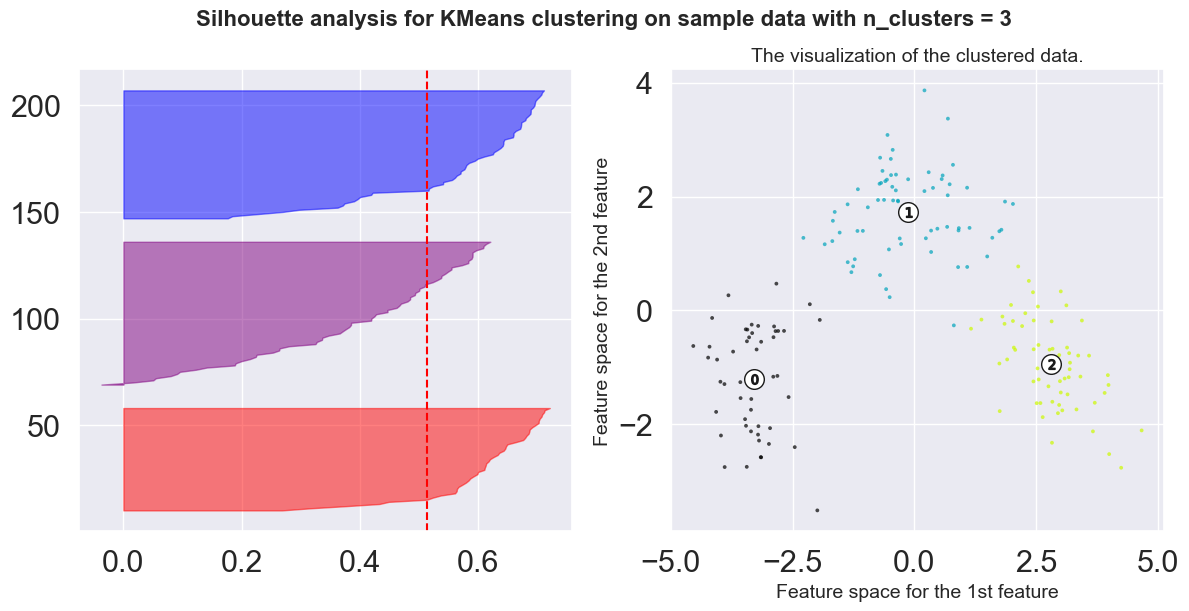

In [52]:
from yellowbrick.cluster import SilhouetteVisualizer

fig,(ax1,ax2)=plt.subplots(1,2,sharey=False)
fig.set_size_inches(14,6)

sil_visualizer1=SilhouetteVisualizer(model_kmeans,ax=ax1,colors=["red","purple","blue"])
sil_visualizer1.fit(pca_std_wine)

# 2nd Plot showing the actual clusters formed
import matplotlib.cm as cm
colors1=cm.nipy_spectral(model_kmeans.labels_.astype(float)/3)
ax2.scatter(pca_std_wine.iloc[:,0],pca_std_wine.iloc[:,1],marker=".",s=30,lw=0,alpha=0.7,c=colors1,edgecolor="k")

# Labeling the clusters
centers1=model_kmeans.cluster_centers_
# Draw white circles at cluster centers
ax2.scatter(centers1[:,0],centers1[:,1],marker="o",c="white",alpha=1,s=200,edgecolor="k")

for i,c in enumerate(centers1):
    ax2.scatter(c[0],c[1],marker='$%d$'% i,alpha=1,s=50,edgecolor="k")
    
ax2.set_title(label ="The visualization of the clustered data.", fontsize=14)
ax2.set_xlabel("Feature space for the 1st feature", fontsize=14)
ax2.set_ylabel("Feature space for the 2nd feature", fontsize=14)
plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
              "with n_clusters = %d" % 3),fontsize=16, fontweight='bold')
plt.show()
    
    

In [53]:
# Elbow Method and Silhouette Score on PCA MinMaxScaler Applied Data

inertia=[]
for i in tqdm(range(2,10)):
    kmeans=KMeans(n_clusters=i,init="k-means++",n_init=15,max_iter=500,random_state=17)
    kmeans.fit(pca_norm_wine)
    inertia.append(kmeans.inertia_)

100%|██████████| 8/8 [00:10<00:00,  1.33s/it]


In [54]:
silhouette={}
for i in tqdm(range(2,10)):
    kmeans=KMeans(n_clusters=i,init="k-means++",n_init=15,max_iter=500,random_state=17)
    kmeans.fit(pca_norm_wine)
    silhouette[i]=sil(pca_norm_wine,kmeans.labels_,metric="euclidean")

100%|██████████| 8/8 [00:10<00:00,  1.33s/it]


<function matplotlib.pyplot.show(close=None, block=None)>

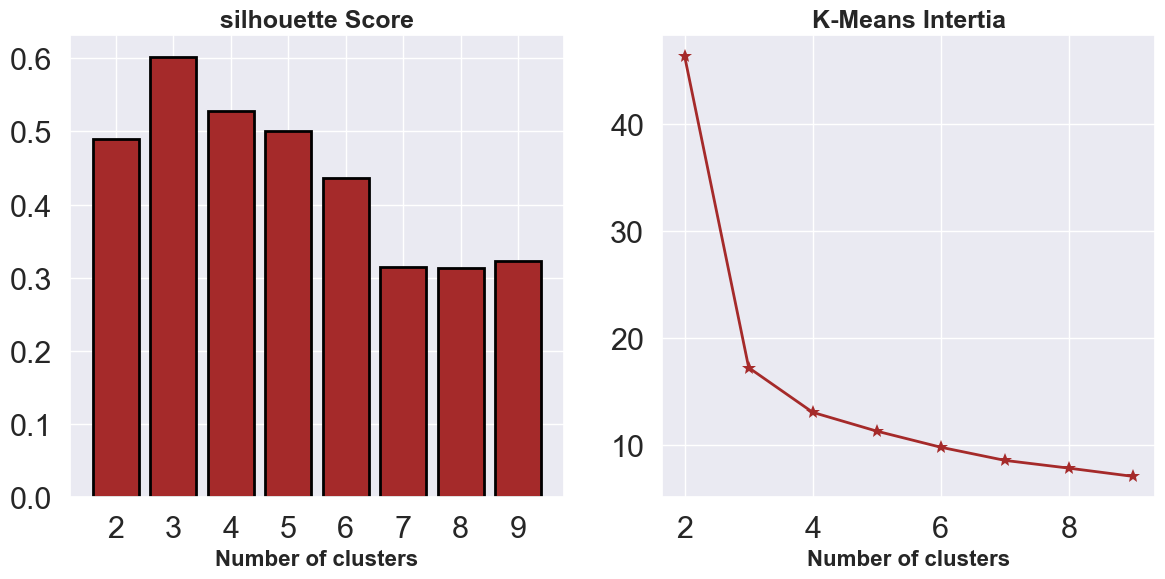

In [55]:
sns.set(style="darkgrid",rc={"figure.figsize":(14,6)},font_scale=2)

plt.subplots(1,2)
plt.plot(range(2,len(inertia)+2),inertia,marker="*",lw=2,color="brown",ms=10)
plt.xlabel("Number of clusters",fontweight="bold",fontsize=16)
plt.title("K-Means Intertia",fontweight="bold",fontsize=18)

plt.subplot(1,2,1)
plt.bar(range(len(silhouette)),list(silhouette.values()),align="center",edgecolor="black",lw=2,color="brown")
plt.xticks(range(len(silhouette)),list(silhouette.keys()))
plt.xlabel("Number of clusters",fontweight="bold",fontsize=16)
plt.title("silhouette Score",fontweight="bold",fontsize=18)
plt.show

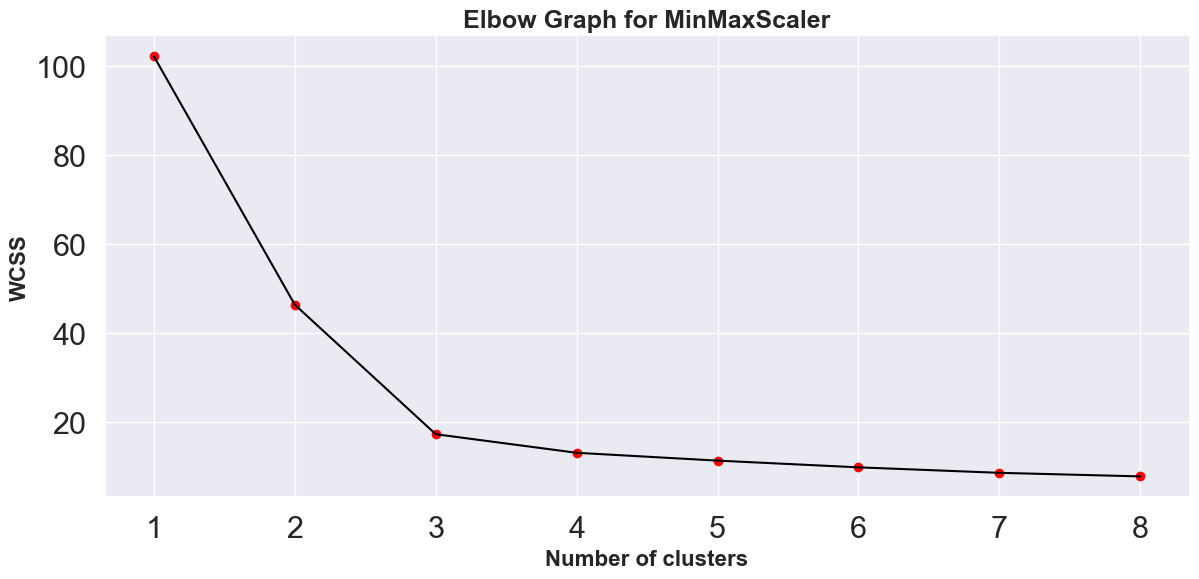

In [56]:
wcss=[]
for i in range(1,9):
    kmeans=KMeans(n_clusters=i,random_state=2)
    kmeans.fit(pca_norm_wine)
    wcss.append(kmeans.inertia_)
    
# Plot K values range vs WCSS to get Elbow graph for choosing K (no. of clusters)

plt.plot(range(1,9),wcss,color="black")
plt.scatter(range(1,9),wcss,color="red")
plt.title('Elbow Graph for MinMaxScaler', fontweight='bold', fontsize=18)
plt.xlabel('Number of clusters', fontweight='bold', fontsize=16)
plt.ylabel('WCSS',fontweight='bold', fontsize=16)
plt.show()


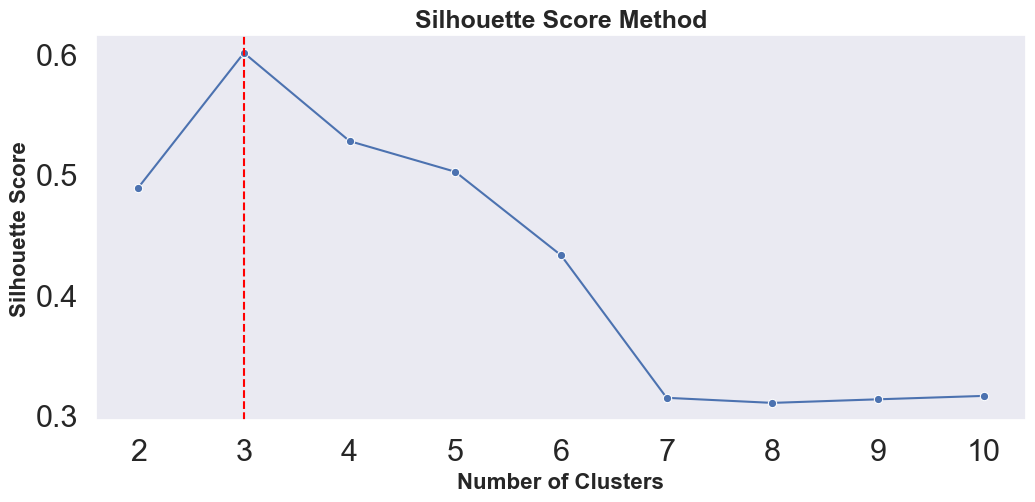

In [57]:
from sklearn.metrics import silhouette_score
n_clusters = [2, 3, 4, 5, 6, 7, 8, 9, 10]  # number of clusters
clusters_inertia = []  # inertia of clusters
s_scores = []  # silhouette scores

for n in n_clusters:
    KM_est = KMeans(n_clusters=n, init='k-means++').fit(pca_norm_wine)
    clusters_inertia.append(KM_est.inertia_)  # data for the elbow method
    silhouette_avg = silhouette_score(pca_norm_wine, KM_est.labels_)
    s_scores.append(silhouette_avg)  # data for the silhouette score method

# Creating a DataFrame for Seaborn

data = {'Number of Clusters': n_clusters, 'Silhouette Score': s_scores}
df = pd.DataFrame(data)

fig, ax = plt.subplots(figsize=(12, 5))
ax = sns.lineplot(x='Number of Clusters', y='Silhouette Score', marker='o', data=df, ax=ax)
ax.set_title("Silhouette Score Method", fontweight='bold', fontsize=18)
ax.set_xlabel("Number of Clusters", fontweight='bold', fontsize=16)
ax.set_ylabel("Silhouette Score", fontweight='bold', fontsize=16)
ax.axvline(3, ls="--", c="red")
plt.grid()
plt.show()

Elbow plot for MinMax Scaler data


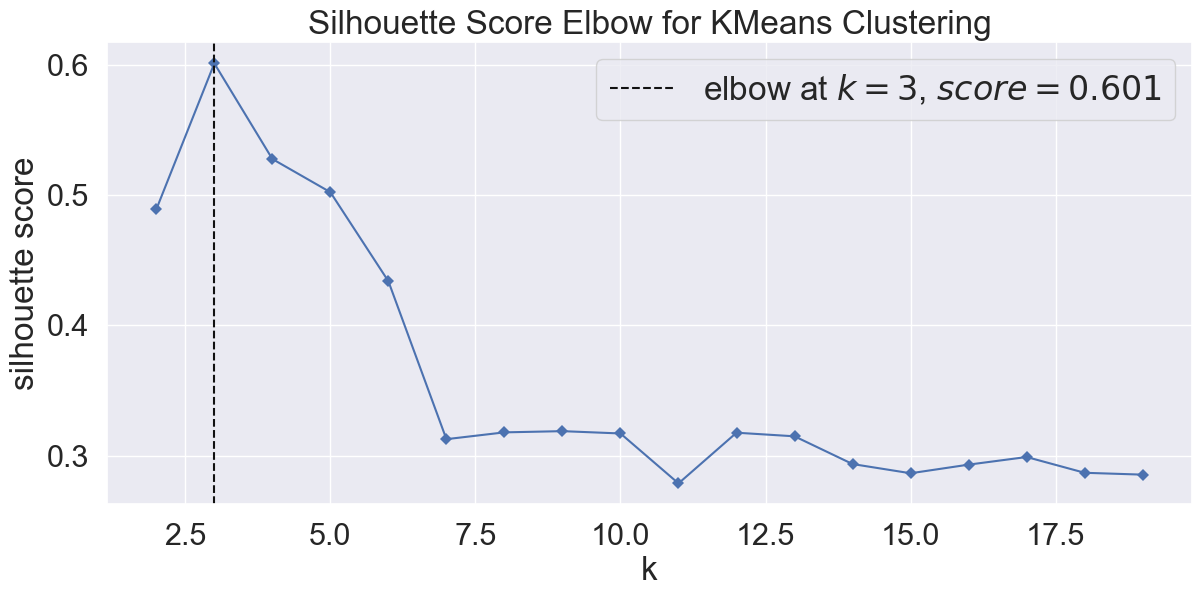

In [58]:
# Instantiate a scikit-learn K-Means model. we will check for two diff hyperparameters value effect

model=KMeans(random_state=10,max_iter=500,init="k-means++")

# Instantiate the KElbowVisualizer with the number of clusters and the metric

visualizer=KElbowVisualizer(model,k=(2,20),metric="silhouette",timings=False)

#Fit the data and visualize

print("Elbow plot for MinMax Scaler data")
visualizer.fit(pca_norm_wine)
visualizer.show()
plt.show()

In [59]:
# With the elbow method, the ideal number of clusters to use was 6 and We will also use the Silhouette score to determine an optimal number
   
clust_list=[2,3,4,5,6,7,8,9]

#  Silhouette score for MinMaxScaler Applied on data .

for n_clusters in clust_list:
    clusterer1=KMeans(n_clusters=n_clusters,random_state=0)
    cluster_labels1=clusterer1.fit_predict(pca_norm_wine)
    sil_score1=sil(pca_norm_wine,cluster_labels1)
    print("For n_clusters =", n_clusters,"The average silhouette_score is :", sil_score1)



For n_clusters = 2 The average silhouette_score is : 0.4890723054163619
For n_clusters = 3 The average silhouette_score is : 0.6012146697343211
For n_clusters = 4 The average silhouette_score is : 0.5277801183188688
For n_clusters = 5 The average silhouette_score is : 0.5046629752487323
For n_clusters = 6 The average silhouette_score is : 0.4349037541626147
For n_clusters = 7 The average silhouette_score is : 0.31154793684682935
For n_clusters = 8 The average silhouette_score is : 0.2981623396107917
For n_clusters = 9 The average silhouette_score is : 0.32016130708396406


In [60]:
# Build KMeans Cluster algorithm using K=3 and PCA on MinMaxScaler Applied Dataset

model_kmeans=KMeans(n_clusters=3,random_state=0,init="k-means++")
y_predict_kmeans=model_kmeans.fit_predict(pca_norm_wine)
y_predict_kmeans.shape

(178,)

In [61]:
y_predict_kmeans

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0])

In [62]:
model_kmeans.labels_

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0])

In [63]:
model_kmeans.cluster_centers_

array([[ 0.88138874, -0.24778301,  0.00788805],
       [ 0.04006814,  0.34414911,  0.01143536],
       [-0.75185715, -0.20328088, -0.0196517 ]])

In [64]:
model_kmeans.inertia_

17.201397917404414

In [65]:
# Assigning clusters to the data set

wine_df["KMeans_Label"]=model_kmeans.labels_

In [66]:
wine_df["KMeans_Label"]

ID
1      2
2      2
3      2
4      2
5      2
      ..
174    0
175    0
176    0
177    0
178    0
Name: KMeans_Label, Length: 178, dtype: int32

In [67]:

wine_df.groupby("Kmeans_Label").agg(["mean"])

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline,KMeans_Label
,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean
Kmeans_Label,,,,,,,,,,,,,,,
0,2.979592,13.151633,3.344490,2.434694,21.438776,99.020408,1.678163,0.797959,0.450816,1.163061,7.343265,0.685918,1.690204,627.551020,0.020408
1,2.000000,12.254118,1.914265,2.239118,20.079412,93.044118,2.248971,2.073382,0.362941,1.601324,3.064706,1.054206,2.788529,506.588235,1.000000
2,1.032787,13.711475,1.997049,2.453770,17.281967,107.786885,2.842131,2.969180,0.289180,1.922951,5.444590,1.067705,3.154754,1110.639344,1.983607


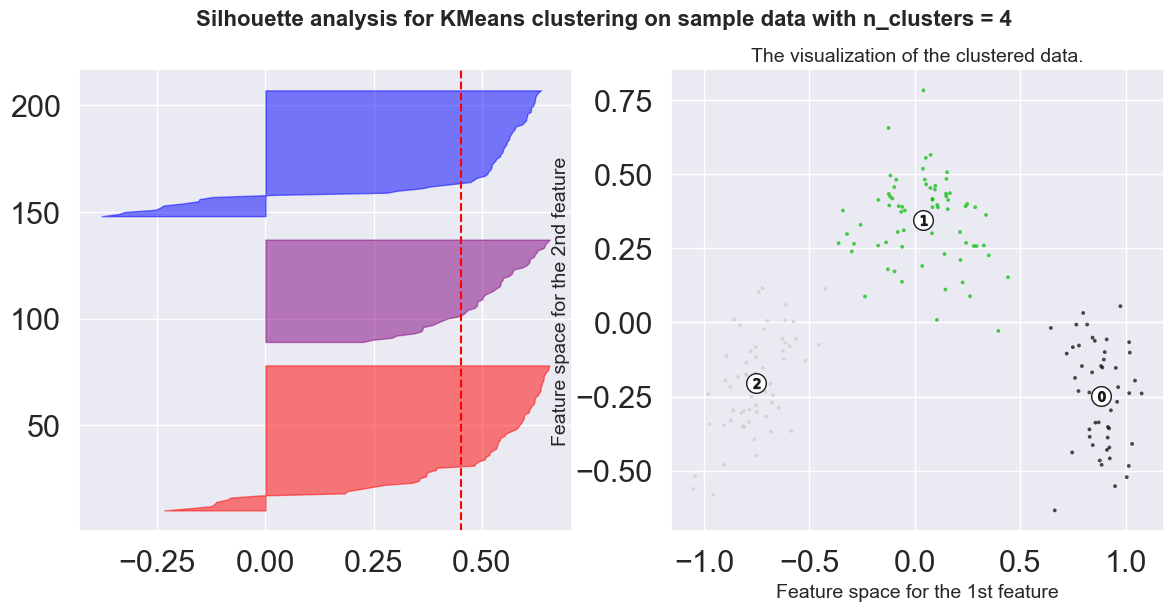

In [68]:
from yellowbrick.cluster import SilhouetteVisualizer

fig,(ax1,ax2)=plt.subplots(1,2,sharey=False)
fig.set_size_inches(14,6)

sil_visualizer1=SilhouetteVisualizer(model_kmeans,ax=ax1,colors=["red","purple","blue"])
sil_visualizer1.fit(pca_std_wine)

# 2nd Plot showing the actual clusters formed

import matplotlib.cm as cm
colors1=cm.nipy_spectral(model_kmeans.labels_.astype(float)/2)
ax2.scatter(pca_norm_wine.iloc[:,0],pca_norm_wine.iloc[:,1],marker=".",s=30,lw=0,alpha=0.7,c=colors1,edgecolor="k")

# Labeling the clusters

centers1=model_kmeans.cluster_centers_

# Draw white circles at cluster centers

ax2.scatter(centers1[:,0],centers1[:,1],marker="o",c="white",alpha=1,s=200,edgecolor="k")
for i, c in enumerate(centers1):
    ax2.scatter(c[0],c[1],marker="$%d$" % i, alpha=1,s=50,edgecolor="k")
    
ax2.set_title(label ="The visualization of the clustered data.", fontsize=14)
ax2.set_xlabel("Feature space for the 1st feature", fontsize=14)
ax2.set_ylabel("Feature space for the 2nd feature", fontsize=14)
plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
              "with n_clusters = %d" % 4), fontsize=16, fontweight='bold')
#sil_visualizer1.show()
plt.show()

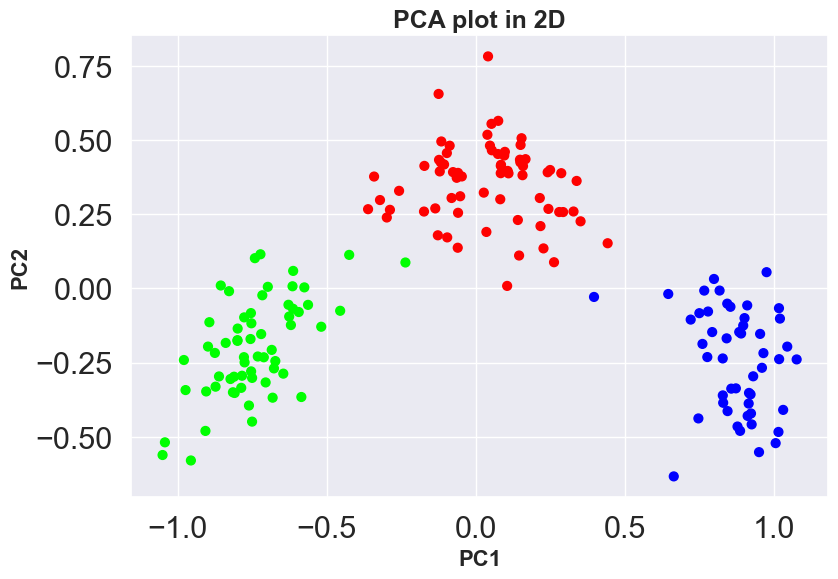

In [69]:
plt.figure(figsize=(9,6))
plt.scatter(pca_norm_wine.iloc[:,0],pca_norm_wine.iloc[:,1],c=wine_df["Kmeans_Label"],cmap="brg",s=40)

plt.title('PCA plot in 2D', fontweight='bold', fontsize=18)
plt.xlabel('PC1', fontweight='bold', fontsize=16)
plt.ylabel('PC2', fontweight='bold', fontsize=16)
plt.show()

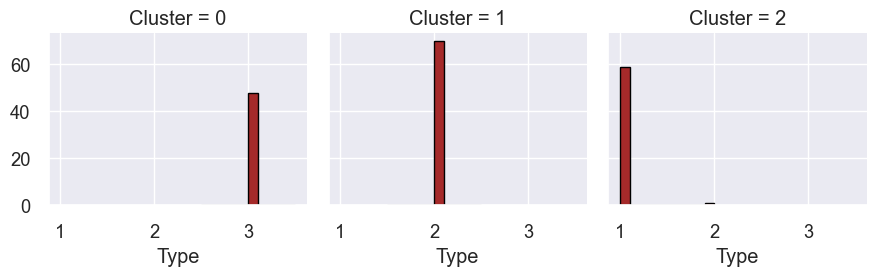

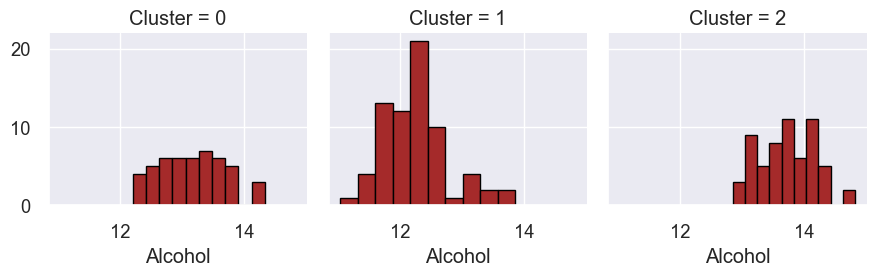

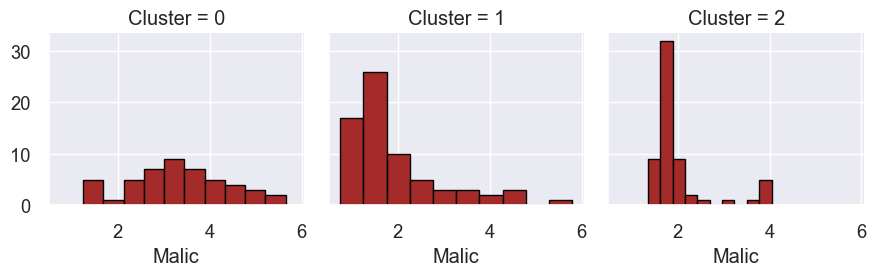

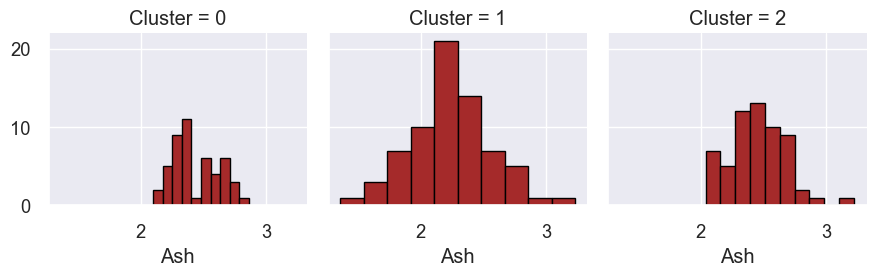

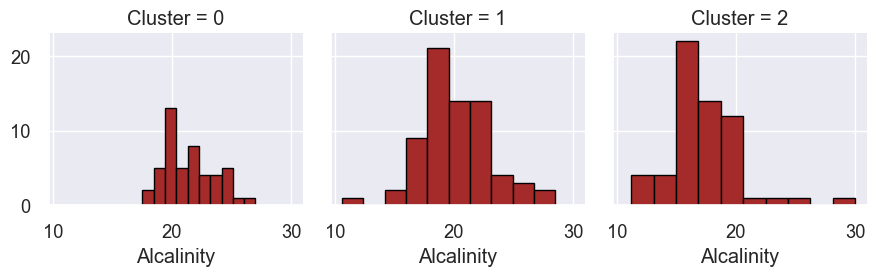

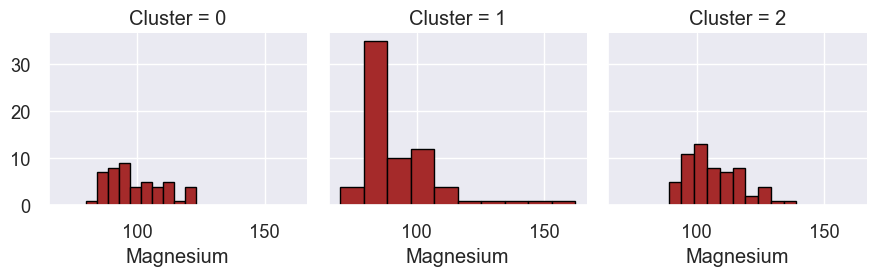

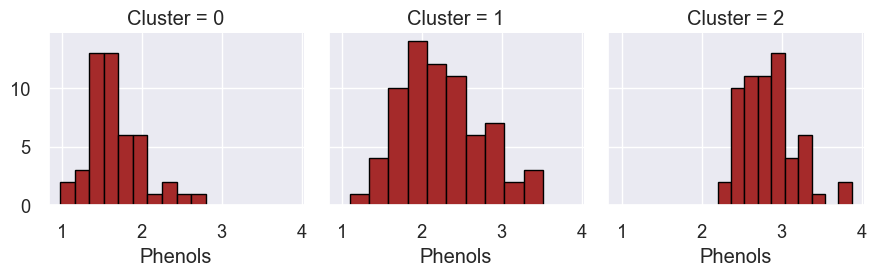

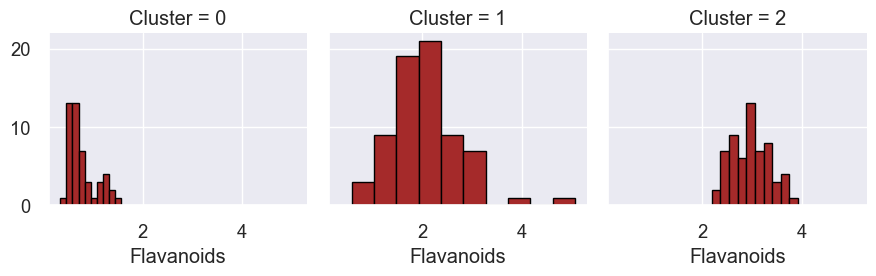

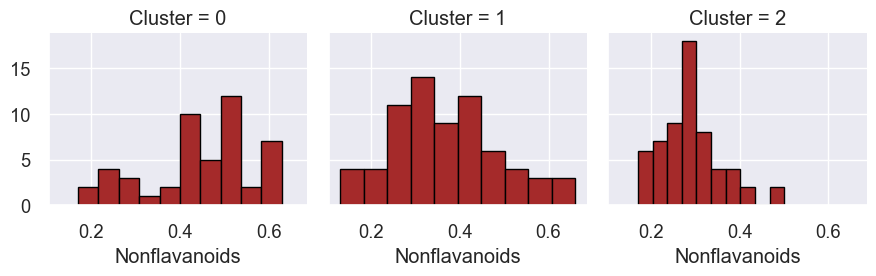

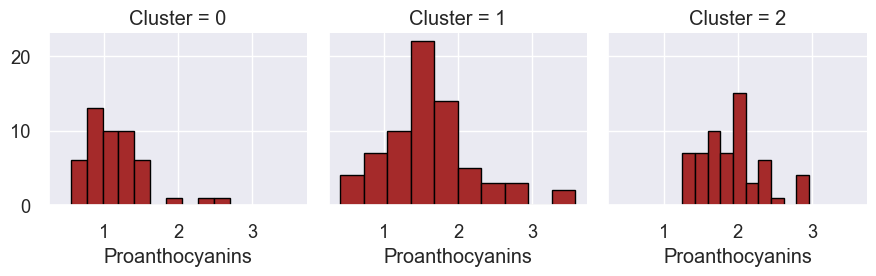

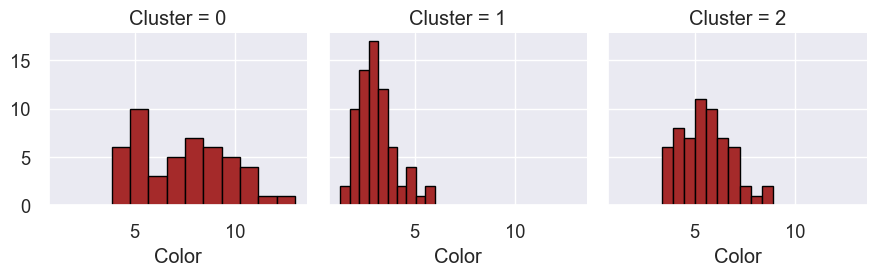

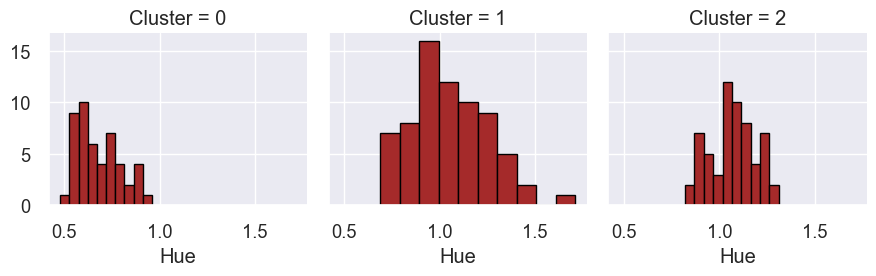

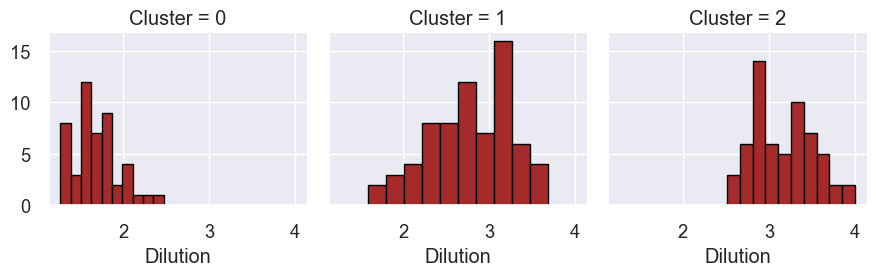

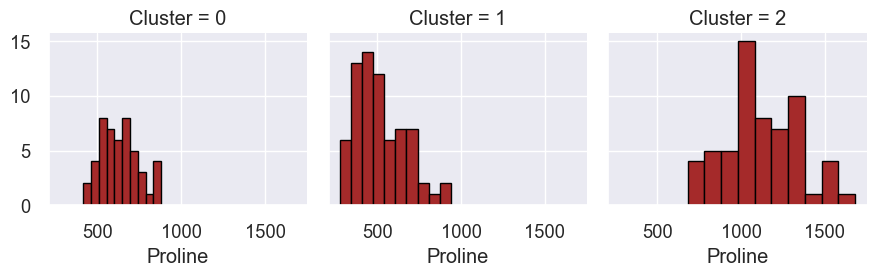

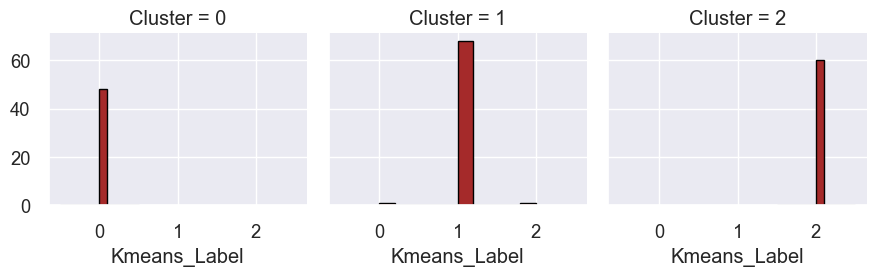

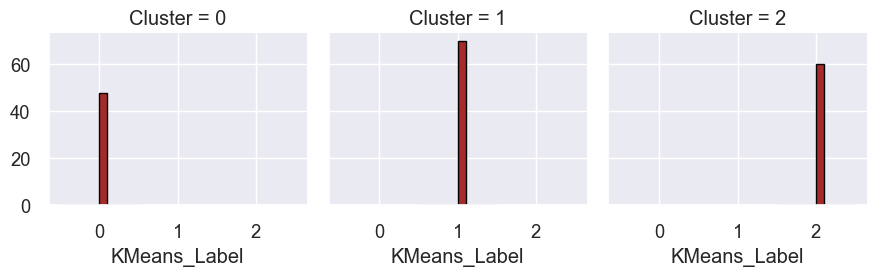

In [70]:
# We can now clearly see the 3 number of clusters formed
    
wine_df1=wine_df.copy()
wine_df1["Cluster"]=model_kmeans.labels_

aux=wine_df1.columns.tolist()
aux[0:len(aux)-1]
sns.set(style="darkgrid",rc={"figure.figsize":(15,10)},font_scale=1.2)

for cluster in aux[0:len(aux)-1]:
    grid=sns.FacetGrid(wine_df1,col="Cluster")
    grid.map(plt.hist,cluster,color="brown",lw=1,edgecolor="black")


In [71]:
#Sorting elements based on cluster label assigned and taking average for insights.

cluster1 = pd.DataFrame(wine_df1.loc[wine_df1.Cluster==0].mean(),columns= ['Cluster1_Avg'])
cluster2 = pd.DataFrame(wine_df1.loc[wine_df1.Cluster==1].mean(),columns= ['Cluster2_Avg'])
cluster3 = pd.DataFrame(wine_df1.loc[wine_df1.Cluster==2].mean(),columns= ['Cluster2_Avg'])
avg_wine = pd.concat([cluster1,cluster2,cluster3],axis=1)
avg_wine

,Cluster1_Avg,Cluster2_Avg,Cluster2_Avg
Type,3.000000,2.000000,1.016667
Alcohol,13.153750,12.268571,13.732167
Malic,3.333750,1.936429,2.005000
Ash,2.437083,2.239714,2.458000
Alcalinity,21.416667,20.098571,17.253333
Magnesium,99.312500,93.914286,106.883333
Phenols,1.678750,2.244000,2.847833
Flavanoids,0.781458,2.069286,2.980833
Nonflavanoids,0.447500,0.365857,0.288667
Proanthocyanins,1.153542,1.625571,1.900333


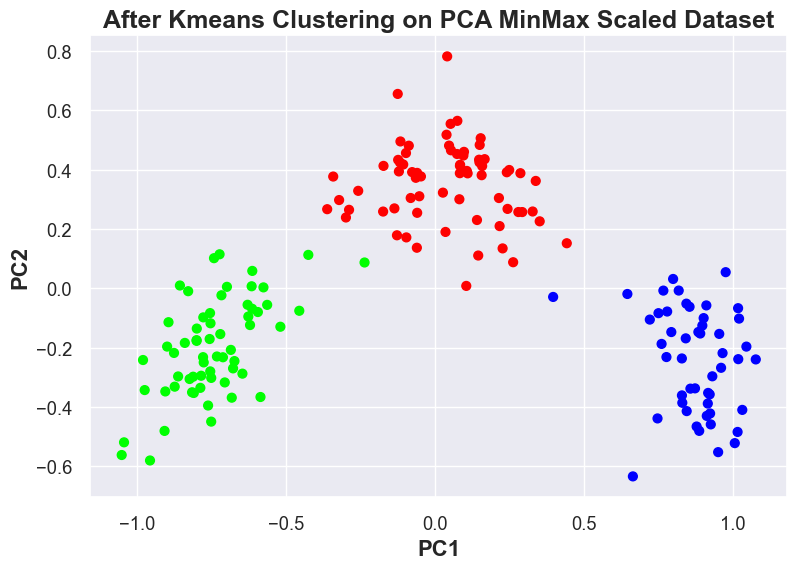

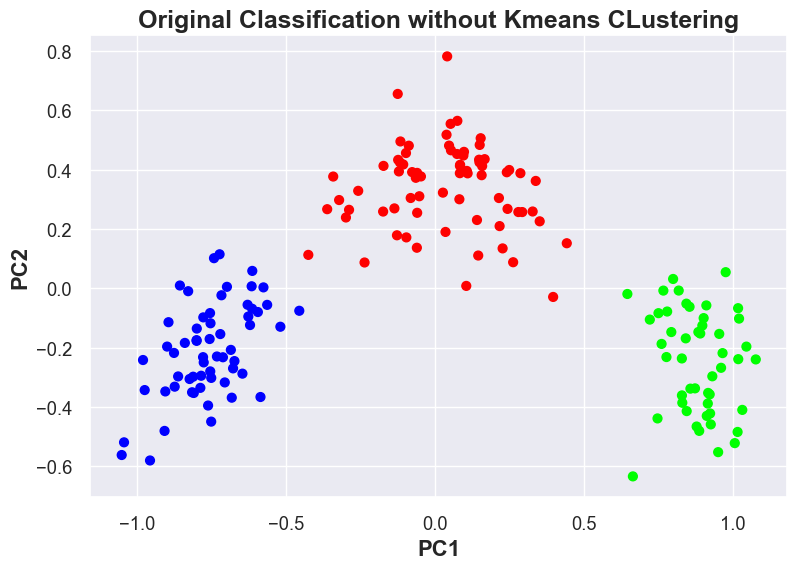

In [72]:
# Comparing Kmeans Clusters with the Original Classified Dataset using "Type" Feature

plt.figure(figsize=(9,6))
plt.scatter(pca_norm_wine.iloc[:,0],pca_norm_wine.iloc[:,1],c=wine_df["Kmeans_Label"],cmap="brg",s=40)
plt.title('After Kmeans Clustering on PCA MinMax Scaled Dataset',fontweight='bold', fontsize=18)
plt.xlabel('PC1', fontweight='bold', fontsize=16)
plt.ylabel('PC2', fontweight='bold', fontsize=16)
plt.show()

plt.figure(figsize=(9,6))
plt.scatter(pca_norm_wine.iloc[:,0],pca_norm_wine.iloc[:,1],c=wine_df["Type"],cmap="brg",s=40)
plt.title('Original Classification without Kmeans CLustering',fontweight='bold', fontsize=18)
plt.xlabel('PC1', fontweight='bold', fontsize=16)
plt.ylabel('PC2', fontweight='bold', fontsize=16)
plt.show()

In [73]:
# Group data by Clusters (K=3)

display("After Applying PCA and Kmeans Clustering on Dataset", wine_df.groupby("Kmeans_Label").agg(["mean"]),"original Classified Dataset",wine.groupby("ID").agg(["mean"]))


'After Applying PCA and Kmeans Clustering on Dataset'

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline,KMeans_Label
,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean
Kmeans_Label,,,,,,,,,,,,,,,
0,2.979592,13.151633,3.344490,2.434694,21.438776,99.020408,1.678163,0.797959,0.450816,1.163061,7.343265,0.685918,1.690204,627.551020,0.020408
1,2.000000,12.254118,1.914265,2.239118,20.079412,93.044118,2.248971,2.073382,0.362941,1.601324,3.064706,1.054206,2.788529,506.588235,1.000000
2,1.032787,13.711475,1.997049,2.453770,17.281967,107.786885,2.842131,2.969180,0.289180,1.922951,5.444590,1.067705,3.154754,1110.639344,1.983607


'original Classified Dataset'

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean
ID,,,,,,,,,,,,,,
1,1.0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
2,1.0,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
3,1.0,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
4,1.0,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
5,1.0,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
174,3.0,13.71,5.65,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740.0
175,3.0,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750.0


# t-SNE

In [74]:
tsne=TSNE(n_components=2)
X_tsne=tsne.fit_transform(norm_wine)
tsne_df=pd.DataFrame(data=X_tsne,columns=["t-SNE Comp.1","t-SNE Comp.2"])

print(tsne_df.shape)
tsne_df.head()

(178, 2)


,t-SNE Comp.1,t-SNE Comp.2
0,-18.590143,-0.005592
1,-16.720011,3.465491
2,-21.430910,3.899745
3,-21.906620,1.513710
4,-18.682571,6.133657


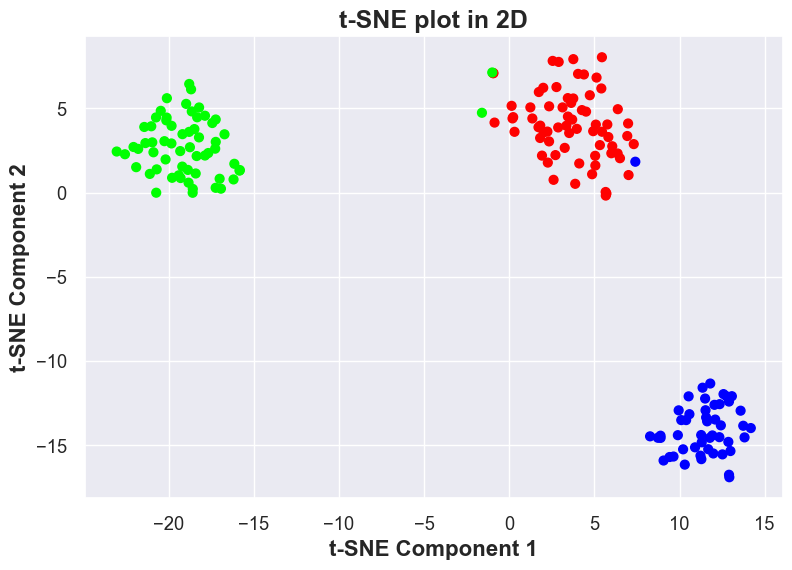

In [75]:
# t-SNE plot in 2D coloured by class

plt.figure(figsize=(9,6))
plt.scatter(tsne_df.iloc[:,0], tsne_df.iloc[:,1], c= wine_df['Kmeans_Label'], cmap="brg", s=40)

plt.title('t-SNE plot in 2D', fontweight='bold', fontsize=18)
plt.xlabel('t-SNE Component 1', fontweight='bold', fontsize=16)
plt.ylabel('t-SNE Component 2', fontweight='bold', fontsize=16)
plt.show()

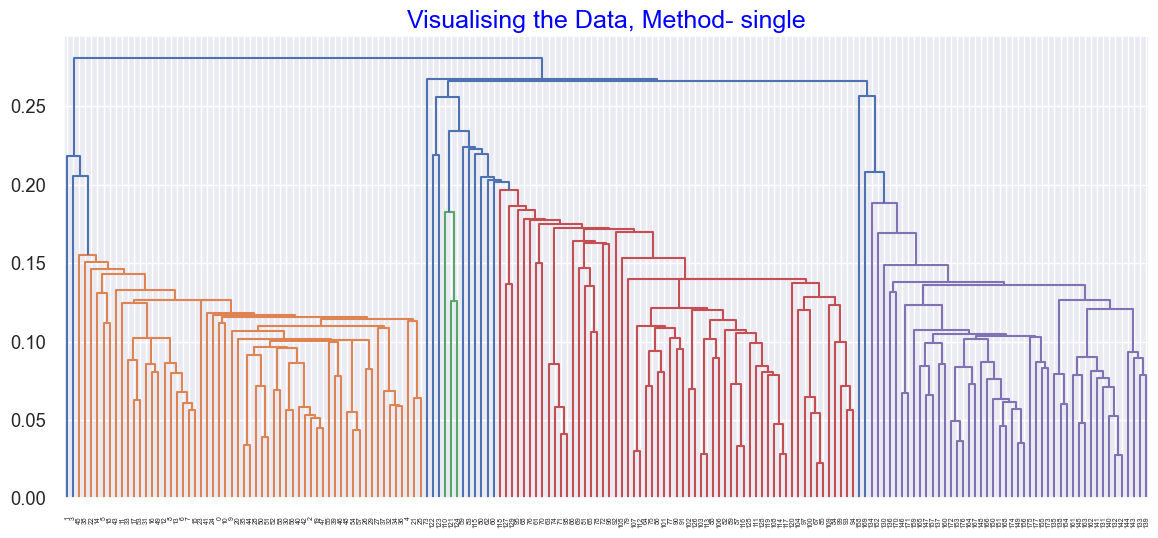

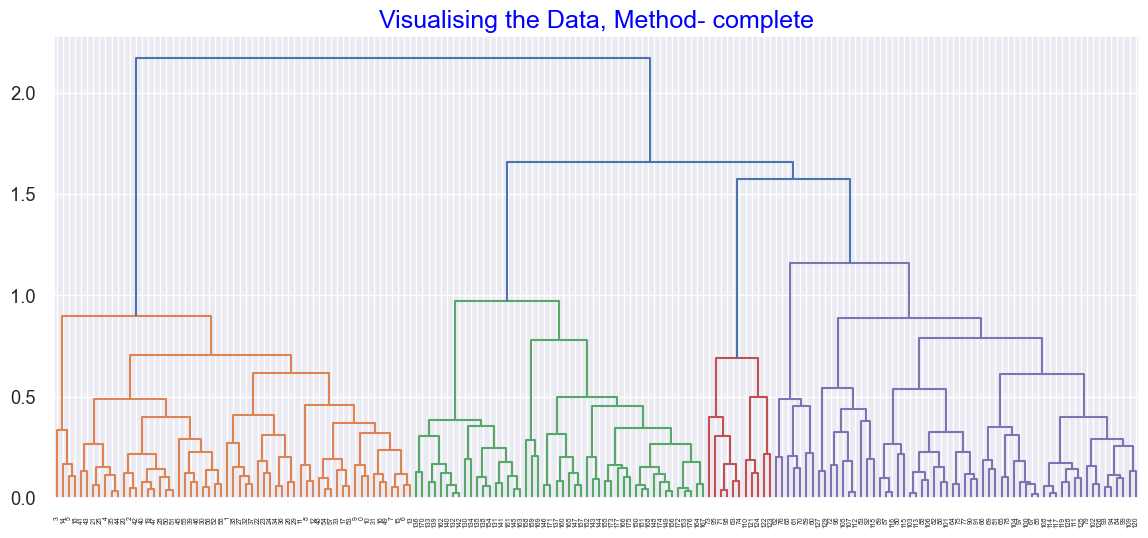

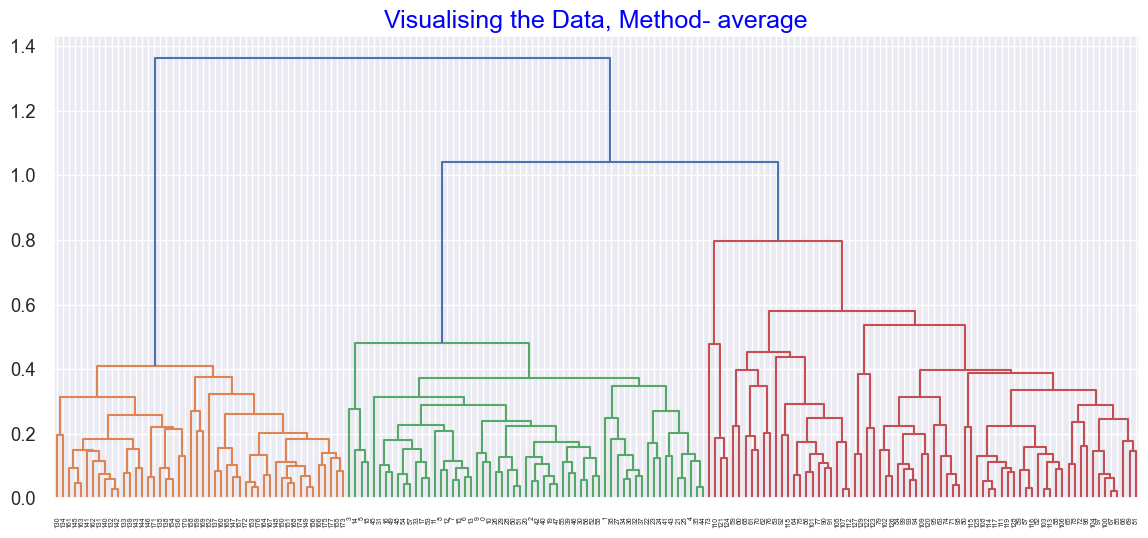

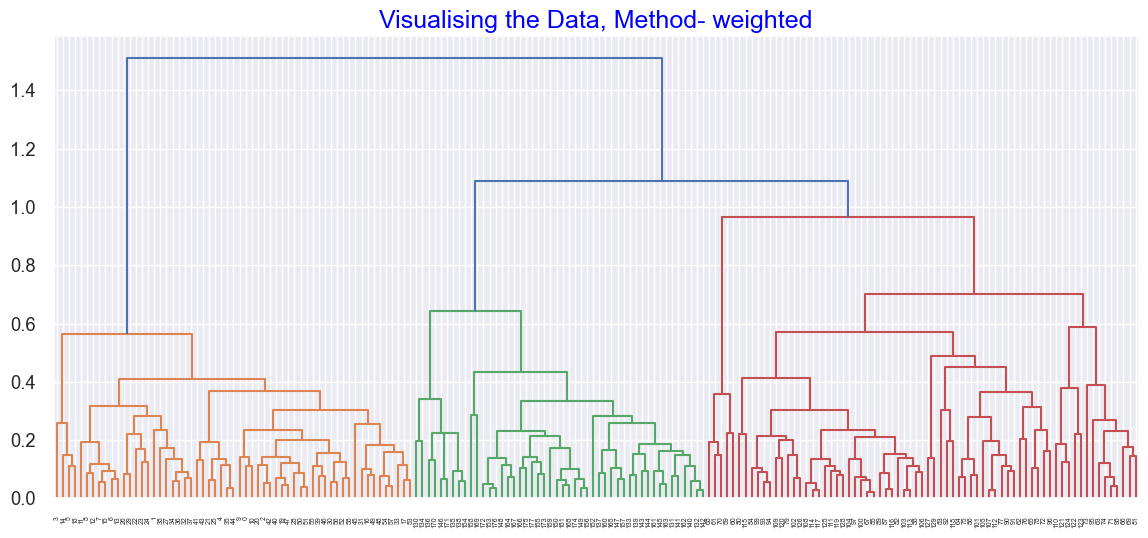

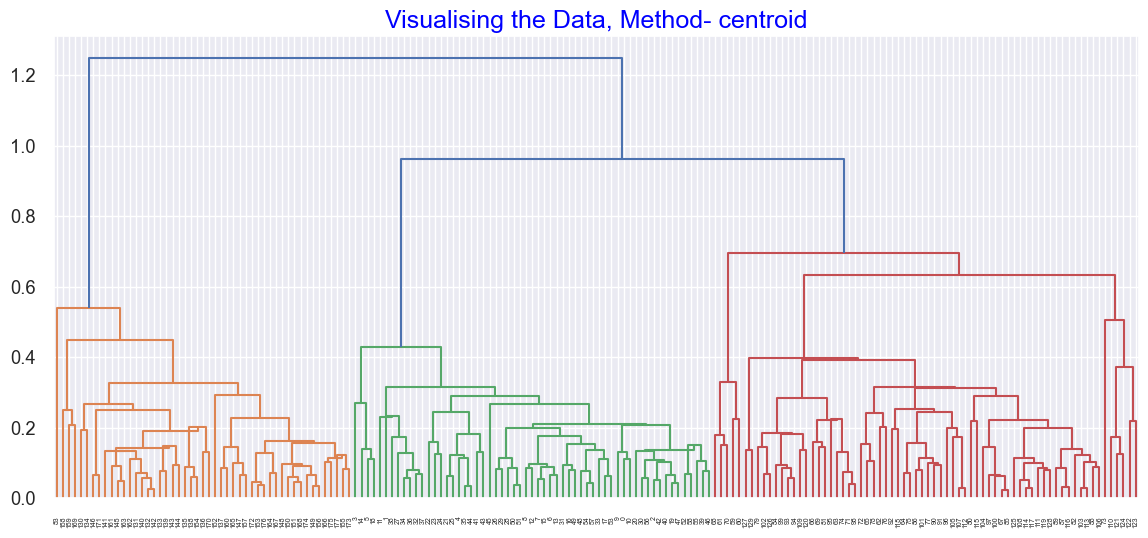

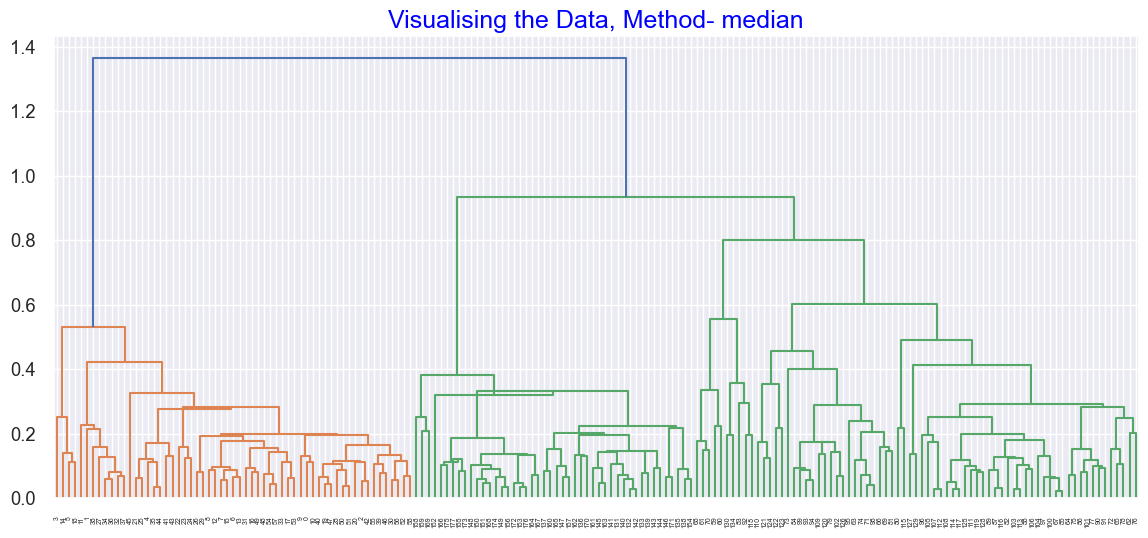

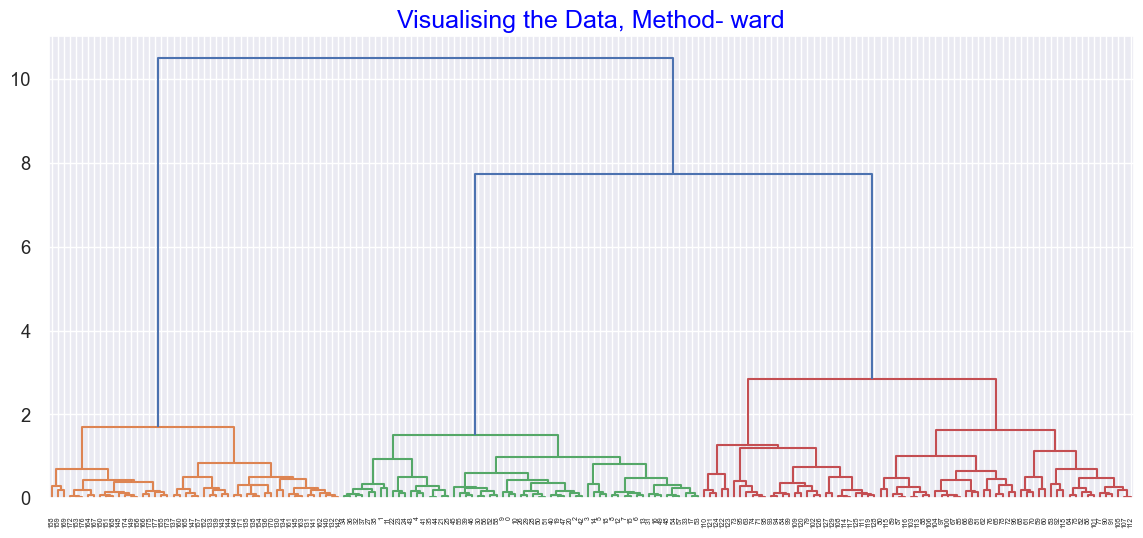

In [76]:
# Hierarchical Clustering Algorithm and  Dendogram on PCA MinMaxScaler Applied Dataset

for methods in ['single','complete','average','weighted','centroid','median','ward']: 
    plt.figure(figsize =(14,6)) 
    
    dict = {'fontsize':18,'fontweight' :16, 'color' : 'blue'}  
    plt.title('Visualising the Data, Method- {}'.format(methods),fontdict = dict) 
    Dendrogram1 = sch.dendrogram(sch.linkage(pca_norm_wine, method = methods,optimal_ordering=False))



In [77]:
#  Silhouette Score method for PCA MinMax Scaled Data & Applying Different Linkages using Euclidean Method for distance Calculation
    
n_clusters=[2,3,4,5,6,7,8,9,10]

for n_clusters in n_clusters:
    for linkages in ["ward","complete","average","single"]:
        hie_cluster1=AgglomerativeClustering(n_clusters=n_clusters,linkage=linkages)
        hie_labels1=hie_cluster1.fit_predict(pca_norm_wine)
        silhouette_score1=sil(pca_norm_wine,hie_labels1)
        print("For n_clusters =", n_clusters,"The average silhouette_score with linkage-",linkages, ':',silhouette_score1)
        print()    

For n_clusters = 2 The average silhouette_score with linkage- ward : 0.5155737566343559

For n_clusters = 2 The average silhouette_score with linkage- complete : 0.4942190040873054

For n_clusters = 2 The average silhouette_score with linkage- average : 0.5155737566343559

For n_clusters = 2 The average silhouette_score with linkage- single : 0.4942190040873054

For n_clusters = 3 The average silhouette_score with linkage- ward : 0.6015492770984981

For n_clusters = 3 The average silhouette_score with linkage- complete : 0.6015492770984981

For n_clusters = 3 The average silhouette_score with linkage- average : 0.6015492770984981

For n_clusters = 3 The average silhouette_score with linkage- single : 0.28989847165360016

For n_clusters = 4 The average silhouette_score with linkage- ward : 0.527412020184894

For n_clusters = 4 The average silhouette_score with linkage- complete : 0.5251633534382516

For n_clusters = 4 The average silhouette_score with linkage- average : 0.55281608070002

In [78]:
# Applying Different Linkages using Different Distance Methods

n_clusters=[2,3,4,5,6,7,8,9,10]

for n_clusters in n_clusters:
    for linkages in ["complete","average","single"]:
        for affinities in ["euclidean","l1", "l2","manhattan", "cosine"]:
            hie_cluster1=AgglomerativeClustering(n_clusters=n_clusters,affinity=affinities,linkage=linkages)
            hie_labels1=hie_cluster1.fit_predict(pca_norm_wine)
            silhouette_score1=sil(pca_norm_wine,hie_labels1)
            print("For n_clusters =", n_clusters,"The average silhouette_score with linkage-",linkages,"and Affinity-",affinities,':',silhouette_score1)
        print()

For n_clusters = 2 The average silhouette_score with linkage- complete and Affinity- euclidean : 0.4942190040873054
For n_clusters = 2 The average silhouette_score with linkage- complete and Affinity- l1 : 0.4957565446894261
For n_clusters = 2 The average silhouette_score with linkage- complete and Affinity- l2 : 0.4942190040873054
For n_clusters = 2 The average silhouette_score with linkage- complete and Affinity- manhattan : 0.4957565446894261
For n_clusters = 2 The average silhouette_score with linkage- complete and Affinity- cosine : 0.4832775533228222

For n_clusters = 2 The average silhouette_score with linkage- average and Affinity- euclidean : 0.5155737566343559
For n_clusters = 2 The average silhouette_score with linkage- average and Affinity- l1 : 0.5157830689922073
For n_clusters = 2 The average silhouette_score with linkage- average and Affinity- l2 : 0.5155737566343559
For n_clusters = 2 The average silhouette_score with linkage- average and Affinity- manhattan : 0.5157830

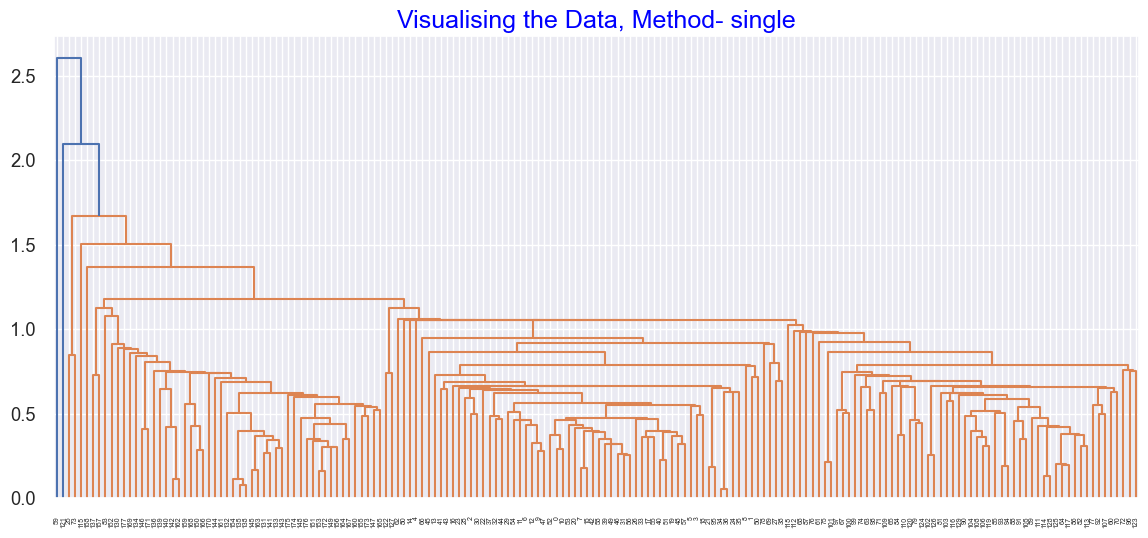

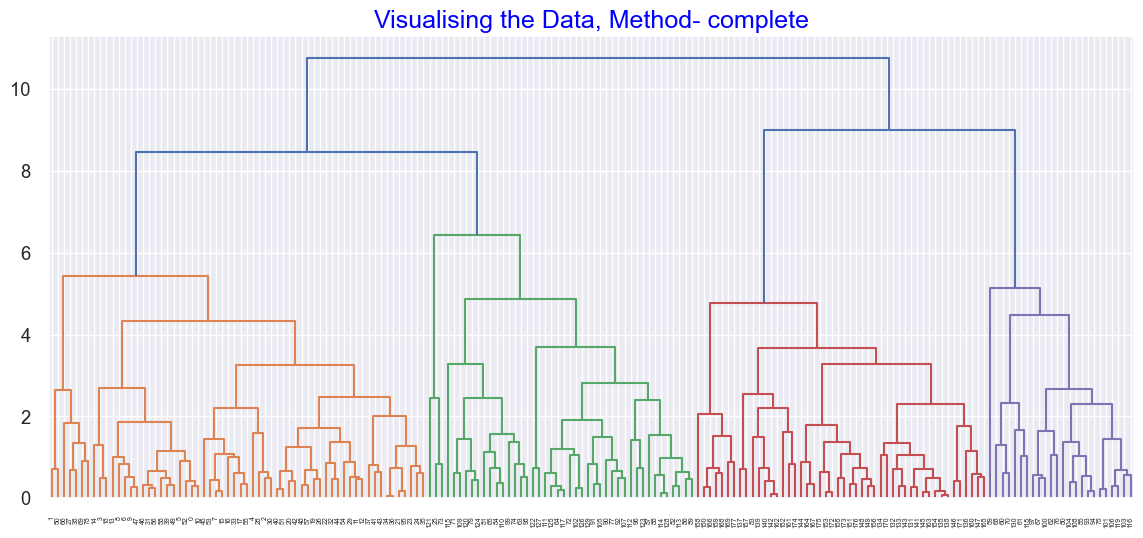

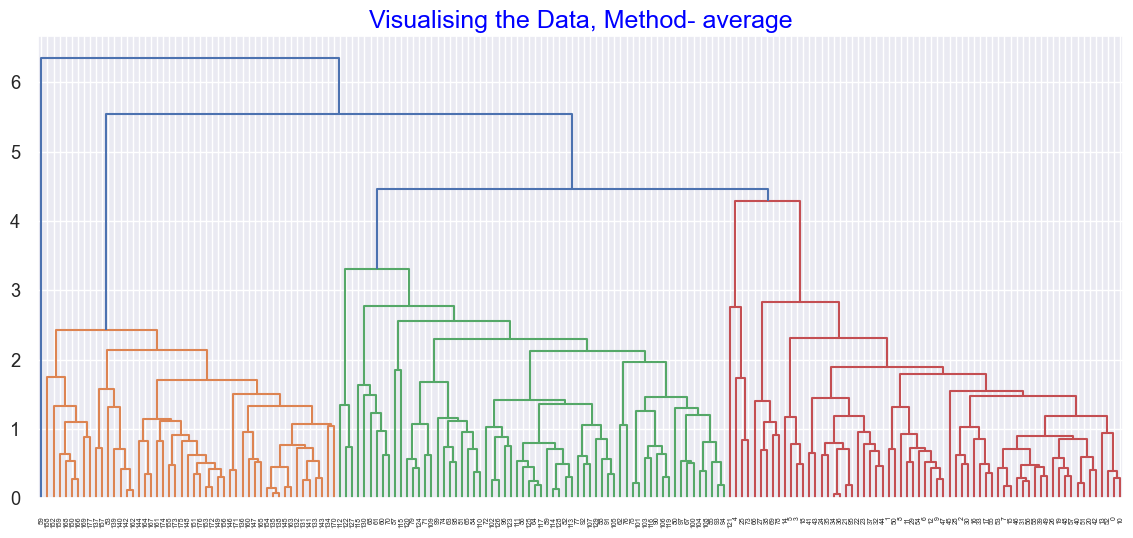

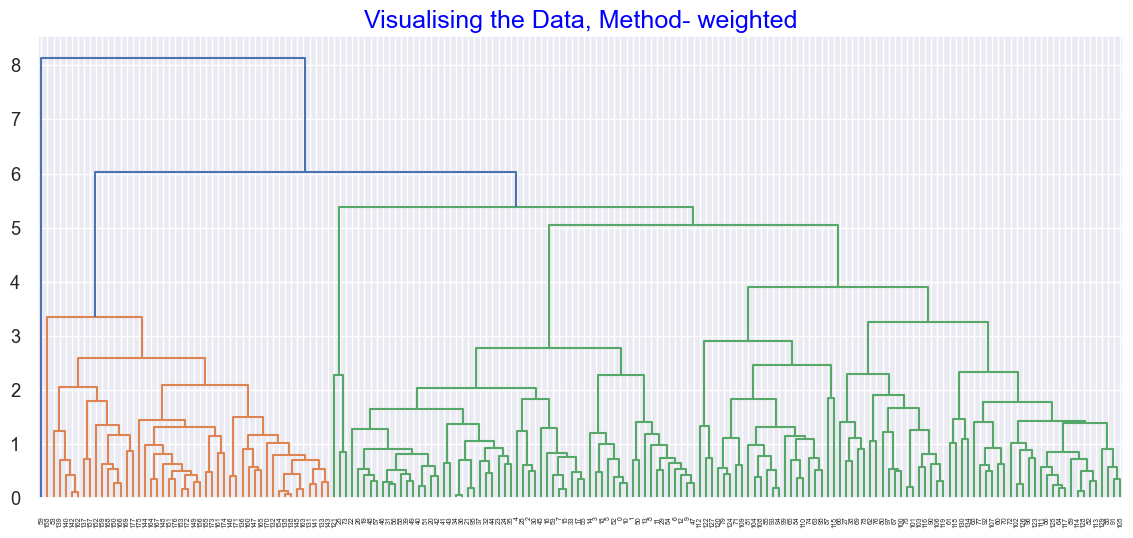

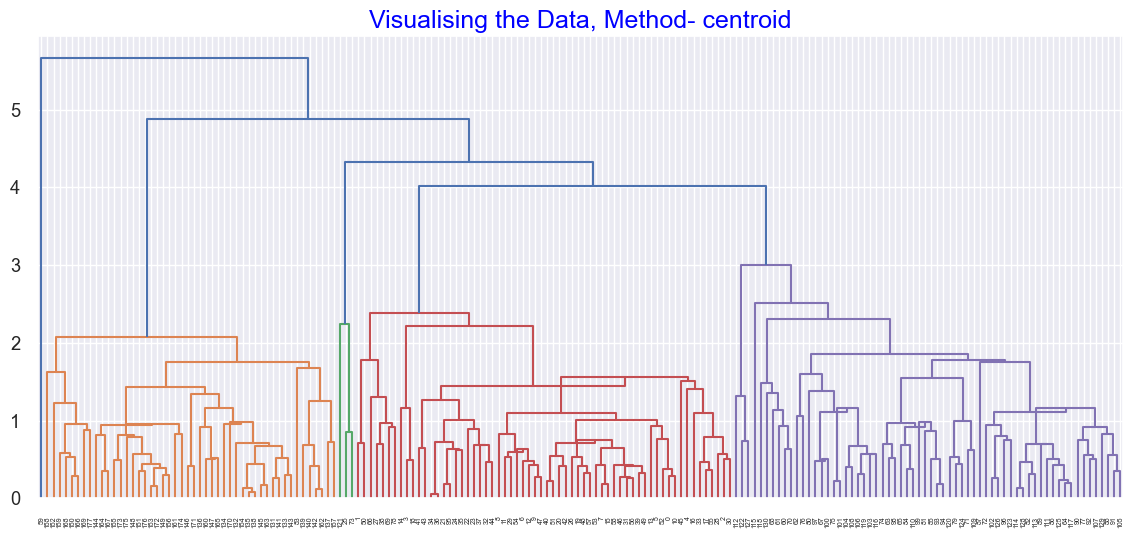

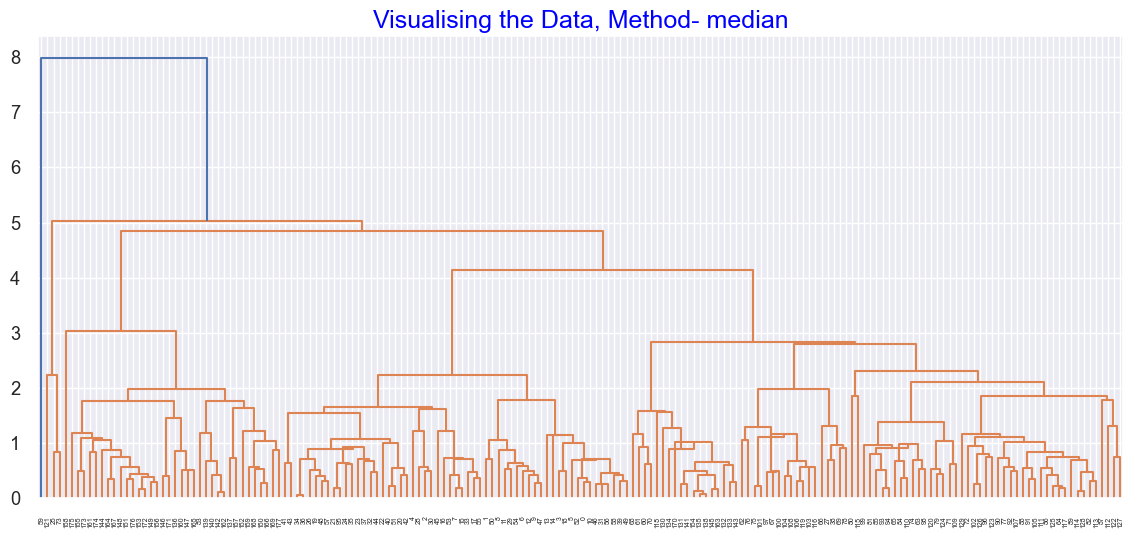

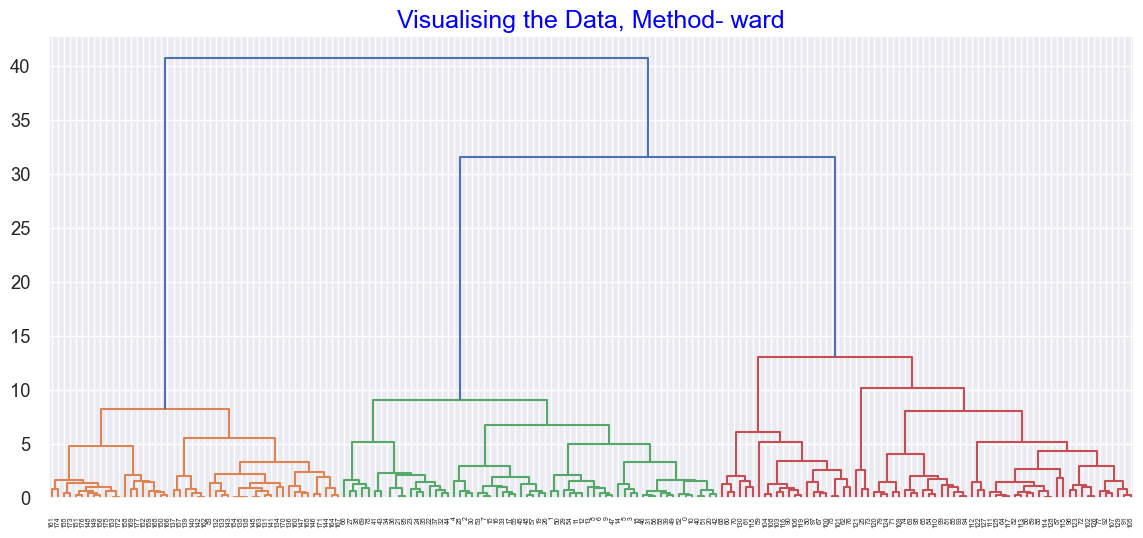

In [79]:
# Dendrogram on Standard Scaler Applied on Data
    
for methods in ['single','complete','average','weighted','centroid','median','ward']: 
    plt.figure(figsize =(14,6))  
    
    dict = {'fontsize':18,'fontweight' :16, 'color' : 'blue'} 
    plt.title('Visualising the Data, Method- {}'.format(methods),fontdict = dict) 
    Dendrogram1 = sch.dendrogram(sch.linkage(pca_std_wine, method = methods,optimal_ordering=False))

In [80]:
# Silhouette Score method for PCA Standard Scaled Data & Applying Different Linkages using Euclidean Method for distance Calculation
    
n_clusters=[2,3,4,5,6,7,8,9,10]

for n_clusters in n_clusters:
    for linkages in ["ward","complete","average","single"]:
        hie_cluster1=AgglomerativeClustering(n_clusters=n_clusters,linkage=linkages)
        hie_labels1=hie_cluster1.fit_predict(pca_std_wine)
        silhouette_score1=sil(pca_std_wine,hie_labels1)
        print("For n_clusters =", n_clusters,"The average silhouette_score with linkage-", linkages, ':',silhouette_score1)
    print()

For n_clusters = 2 The average silhouette_score with linkage- ward : 0.44721781379239606
For n_clusters = 2 The average silhouette_score with linkage- complete : 0.3429067068238453
For n_clusters = 2 The average silhouette_score with linkage- average : 0.3294922756457696
For n_clusters = 2 The average silhouette_score with linkage- single : 0.3294922756457696

For n_clusters = 3 The average silhouette_score with linkage- ward : 0.5006444501191468
For n_clusters = 3 The average silhouette_score with linkage- complete : 0.3018182449367175
For n_clusters = 3 The average silhouette_score with linkage- average : 0.42185702229604755
For n_clusters = 3 The average silhouette_score with linkage- single : 0.23707739937331113

For n_clusters = 4 The average silhouette_score with linkage- ward : 0.4371707740940231
For n_clusters = 4 The average silhouette_score with linkage- complete : 0.4334966057914043
For n_clusters = 4 The average silhouette_score with linkage- average : 0.49390301344215326
F

In [81]:
# Applying Different Linkages using Different Distance Methods

n_clusters=[2,3,4,5,6,7,8,9,10]

for n_clusters in n_clusters:
    for linkages in ["complete","average","single"]:
        for affinities in ["euclidean","l1","l2","manhattan","cosine"]:
            hie_cluster2=AgglomerativeClustering(n_clusters=n_clusters,affinity=affinities,linkage=linkages)
            hie_labels2=hie_cluster2.fit_predict(pca_std_wine)
            silhouette_score2=sil(pca_std_wine,hie_labels2)
            print("For n_clusters =", n_clusters,"The average silhouette_score with linkage-",linkages,"and Affinity-",affinities,':',silhouette_score2)
        print()

For n_clusters = 2 The average silhouette_score with linkage- complete and Affinity- euclidean : 0.3429067068238453
For n_clusters = 2 The average silhouette_score with linkage- complete and Affinity- l1 : 0.2368251725477942
For n_clusters = 2 The average silhouette_score with linkage- complete and Affinity- l2 : 0.3429067068238453
For n_clusters = 2 The average silhouette_score with linkage- complete and Affinity- manhattan : 0.2368251725477942
For n_clusters = 2 The average silhouette_score with linkage- complete and Affinity- cosine : 0.4504312105328891

For n_clusters = 2 The average silhouette_score with linkage- average and Affinity- euclidean : 0.3294922756457696
For n_clusters = 2 The average silhouette_score with linkage- average and Affinity- l1 : 0.3294922756457696
For n_clusters = 2 The average silhouette_score with linkage- average and Affinity- l2 : 0.3294922756457696
For n_clusters = 2 The average silhouette_score with linkage- average and Affinity- manhattan : 0.3294922

In [82]:
# Run Hierarchical Clustering.(Agglomerative Clustering) For PCA on Standard Scaled Data

agg_clustering=AgglomerativeClustering(n_clusters=4,linkage="complete",affinity="l1")
y_pred_hie=agg_clustering.fit_predict(pca_std_wine)
print(y_pred_hie.shape)
y_pred_hie


(178,)


array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2], dtype=int64)

In [83]:
agg_clustering.n_clusters_

4

In [84]:
(sil(pca_std_wine, agg_clustering.labels_)*100).round(3)



50.469

In [85]:
# Putting Cluster lables into original dataset And analysis of the same

wine_df['Hierarchical_Labels'] = agg_clustering.labels_
wine_df.head()


,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline,Kmeans_Label,KMeans_Label,Hierarchical_Labels
ID,,,,,,,,,,,,,,,,,
1,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,2,2,1
2,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,2,2,1
3,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,2,2,1
4,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,2,2,1
5,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,2,2,1


In [86]:
wine_df.groupby('Hierarchical_Labels').agg(['mean'])


,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline,Kmeans_Label,KMeans_Label
,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean
Hierarchical_Labels,,,,,,,,,,,,,,,,
0,2.014706,12.272353,1.945882,2.234853,20.035294,93.191176,2.204853,1.993676,0.364265,1.577941,3.029412,1.047588,2.736029,509.205882,0.970588,0.985294
1,1.033333,13.724500,1.985167,2.426000,16.903333,106.500000,2.840333,2.978833,0.287000,1.928333,5.508167,1.063500,3.148667,1107.266667,1.983333,1.966667
2,3.000000,13.160000,3.375957,2.439574,21.489362,98.829787,1.682340,0.771489,0.452553,1.158085,7.466383,0.681064,1.691915,629.893617,0.000000,0.000000
3,1.666667,12.533333,1.923333,3.016667,27.833333,127.333333,3.036667,3.550000,0.383333,1.916667,4.310000,1.123333,3.463333,760.000000,1.666667,1.666667


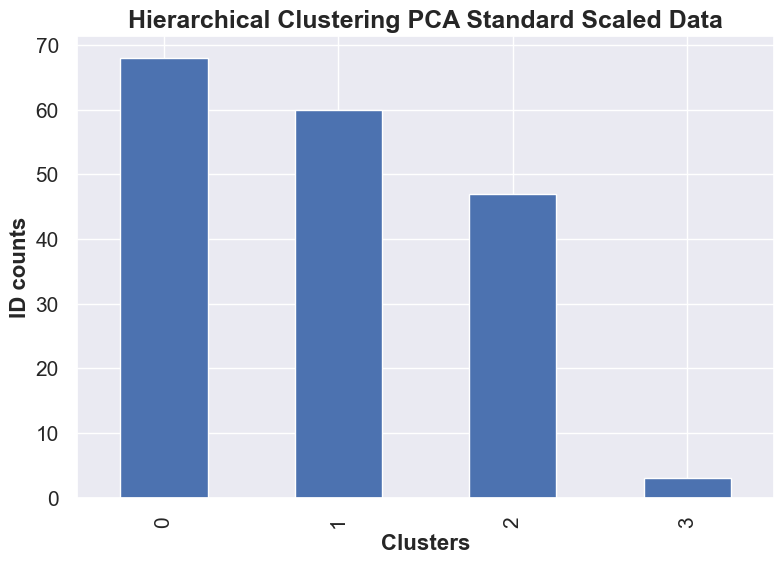

In [87]:
# Plotting barplot using groupby method to get visualize how many row no. in each cluster

fig,ax=plt.subplots(figsize=(9,6))
wine_df.groupby(["Hierarchical_Labels"]).count()["Type"].plot(kind="bar")
plt.ylabel("ID Counts")
plt.title("Hierarchical Clustering PCA Standard Scaled Data",fontsize= 18,fontweight="bold")
ax.set_xlabel('Clusters', fontweight='bold', fontsize=16)
ax.set_ylabel('ID counts', fontweight='bold', fontsize=16)
plt.yticks(fontsize=15)
plt.xticks(fontsize=15)
plt.show()

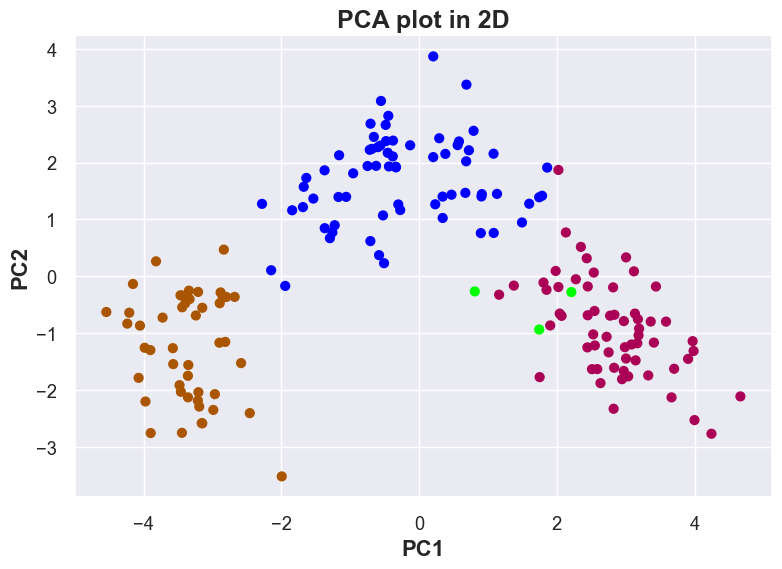

In [88]:
plt.figure(figsize=(9,6))
plt.scatter(pca_std_wine.iloc[:,0],pca_std_wine.iloc[:,1],c=wine_df["Hierarchical_Labels"],cmap="brg",s=40)

plt.title('PCA plot in 2D',fontweight='bold', fontsize=18)
plt.xlabel('PC1', fontweight='bold', fontsize=16)
plt.ylabel('PC2', fontweight='bold', fontsize=16)
plt.show()

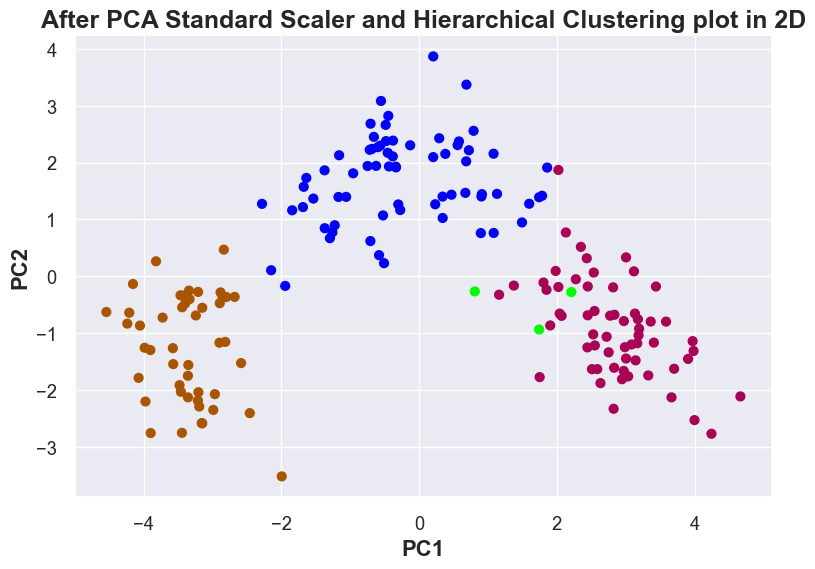

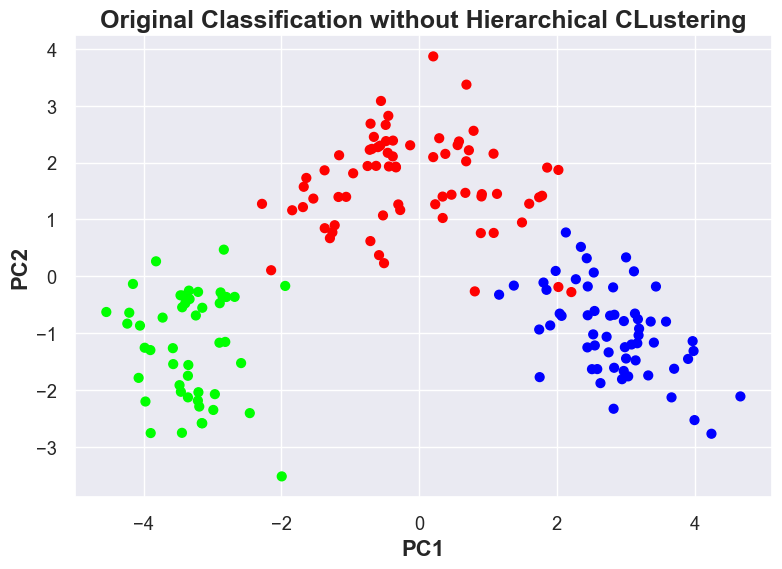

In [89]:
# Comparing Hierarchical Clusters with the Original Classified Dataset using "Type" Feature

plt.figure(figsize=(9,6))
plt.scatter(pca_std_wine.iloc[:,0], pca_std_wine.iloc[:,1], c= wine_df['Hierarchical_Labels'], cmap="brg", s=40)
plt.title('After PCA Standard Scaler and Hierarchical Clustering plot in 2D', fontweight='bold', fontsize=18)
plt.xlabel('PC1',fontweight='bold', fontsize=16)
plt.ylabel('PC2',fontweight='bold', fontsize=16)
plt.show()

plt.figure(figsize=(9,6))
plt.scatter(pca_std_wine.iloc[:,0], pca_std_wine.iloc[:,1], c= wine_df['Type'], cmap="brg", s=40)
plt.title('Original Classification without Hierarchical CLustering', fontweight='bold', fontsize=18)
plt.xlabel('PC1',fontweight='bold', fontsize=16)
plt.ylabel('PC2',fontweight='bold', fontsize=16)
plt.show()

In [90]:
# Group data by Clusters (Clusters=4)


display('After Applying Hierarchical Clustering on PCA Standard Scaled Dataset',wine_df.groupby('Hierarchical_Labels').agg(['mean']),'Original Classified Dataset',wine.groupby('ID').agg(['mean']).head())


'After Applying Hierarchical Clustering on PCA Standard Scaled Dataset'

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline,Kmeans_Label,KMeans_Label
,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean
Hierarchical_Labels,,,,,,,,,,,,,,,,
0,2.014706,12.272353,1.945882,2.234853,20.035294,93.191176,2.204853,1.993676,0.364265,1.577941,3.029412,1.047588,2.736029,509.205882,0.970588,0.985294
1,1.033333,13.724500,1.985167,2.426000,16.903333,106.500000,2.840333,2.978833,0.287000,1.928333,5.508167,1.063500,3.148667,1107.266667,1.983333,1.966667
2,3.000000,13.160000,3.375957,2.439574,21.489362,98.829787,1.682340,0.771489,0.452553,1.158085,7.466383,0.681064,1.691915,629.893617,0.000000,0.000000
3,1.666667,12.533333,1.923333,3.016667,27.833333,127.333333,3.036667,3.550000,0.383333,1.916667,4.310000,1.123333,3.463333,760.000000,1.666667,1.666667


'Original Classified Dataset'

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean
ID,,,,,,,,,,,,,,
1,1.0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
2,1.0,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
3,1.0,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
4,1.0,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
5,1.0,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0


In [91]:
# Run Hierarchical Clustering.(Agglomerative Clustering) For PCA on MinMaxScaled Data

agg_clustering = AgglomerativeClustering(n_clusters=3, linkage='average', affinity='l2')
y_pred_hie = agg_clustering.fit_predict(pca_norm_wine)
print(y_pred_hie.shape)
y_pred_hie

(178,)


array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1], dtype=int64)

In [92]:
agg_clustering.n_clusters_

3

In [93]:
(sil(pca_norm_wine, agg_clustering.labels_)*100).round(3)


60.155

In [94]:
# Putting Cluster lables into original dataset And analysis of the same

wine_df['Hierarchical_Labels'] = agg_clustering.labels_
wine_df.head()


,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline,Kmeans_Label,KMeans_Label,Hierarchical_Labels
ID,,,,,,,,,,,,,,,,,
1,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,2,2,2
2,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,2,2,2
3,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,2,2,2
4,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,2,2,2
5,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,2,2,2


In [95]:
wine_df.groupby('Hierarchical_Labels').agg(['mean'])


,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline,Kmeans_Label,KMeans_Label
,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean
Hierarchical_Labels,,,,,,,,,,,,,,,,
0,2.0,12.278732,1.932676,2.244789,20.238028,94.549296,2.258873,2.080845,0.363662,1.630282,3.086620,1.056282,2.785352,519.507042,1.014085,1.014085
1,3.0,13.153750,3.333750,2.437083,21.416667,99.312500,1.678750,0.781458,0.447500,1.153542,7.396250,0.682708,1.683542,629.895833,0.000000,0.000000
2,1.0,13.744746,2.010678,2.455593,17.037288,106.338983,2.840169,2.982373,0.290000,1.899322,5.528305,1.062034,3.157797,1115.711864,2.000000,2.000000


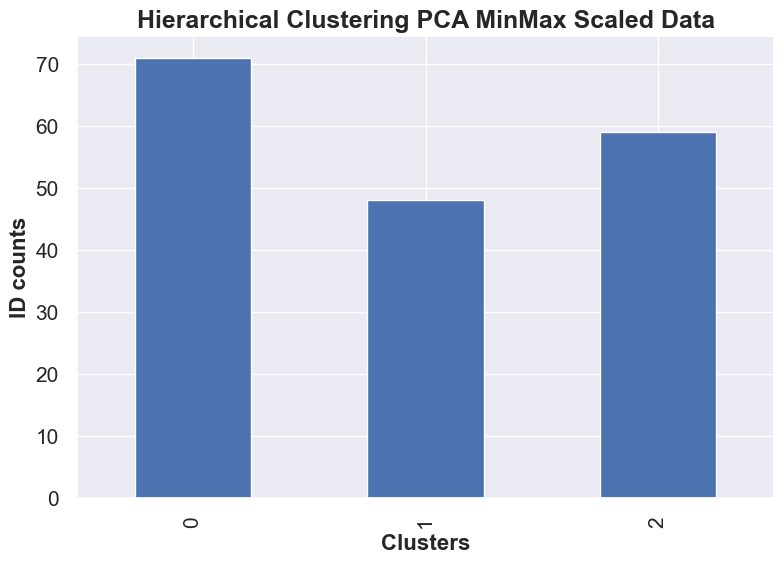

In [96]:
# Plotting barplot using groupby method to get visualize how many row no. in each cluster

fig,ax=plt.subplots(figsize=(9,6))
wine_df.groupby(['Hierarchical_Labels']).count()['Type'].plot(kind='bar')
plt.ylabel("ID Counts")
plt.title('Hierarchical Clustering PCA MinMax Scaled Data', fontweight='bold', fontsize=18)
ax.set_xlabel('Clusters', fontweight='bold', fontsize=16)
ax.set_ylabel('ID counts', fontweight='bold', fontsize=16)
plt.yticks(fontsize=15)
plt.xticks(fontsize=15)
plt.show()

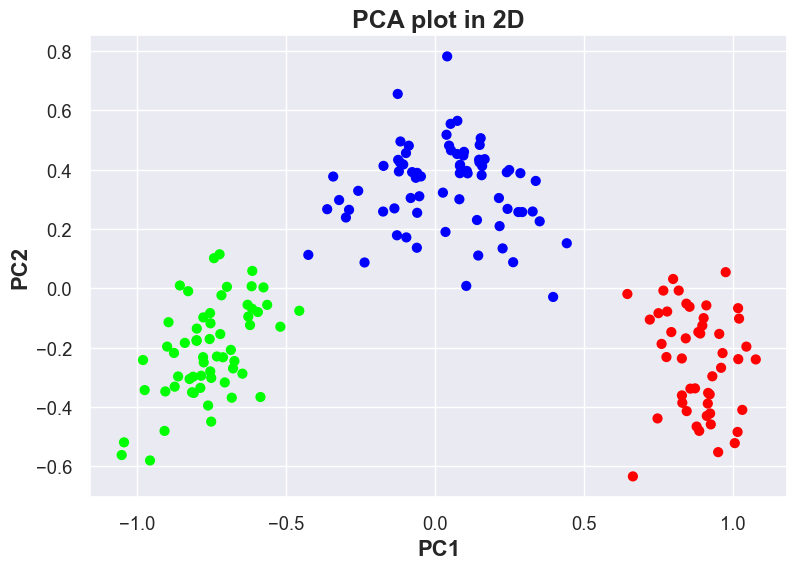

In [97]:
plt.figure(figsize=(9,6))
plt.scatter(pca_norm_wine.iloc[:,0], pca_norm_wine.iloc[:,1], c= wine_df['Hierarchical_Labels'], cmap="brg", s=40)

plt.title('PCA plot in 2D', fontweight='bold', fontsize=18)
plt.xlabel('PC1', fontweight='bold', fontsize=16)
plt.ylabel('PC2', fontweight='bold', fontsize=16)
plt.show()

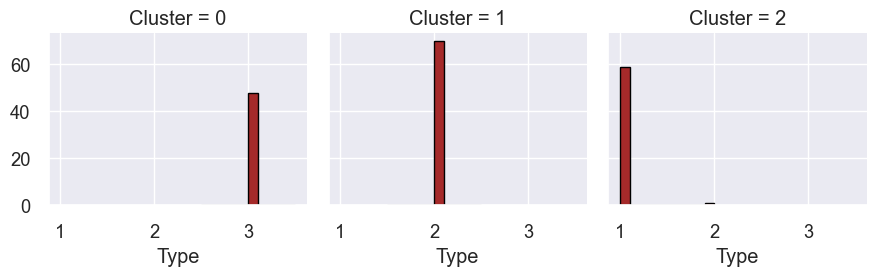

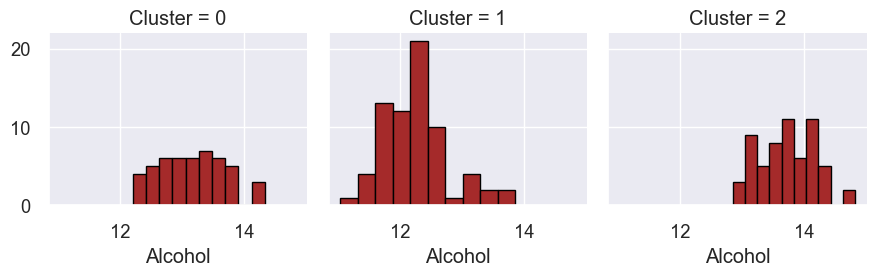

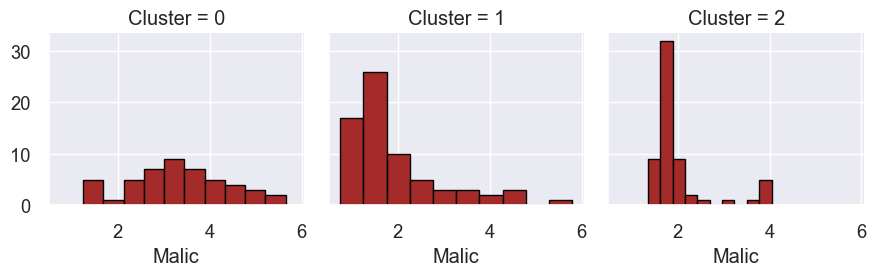

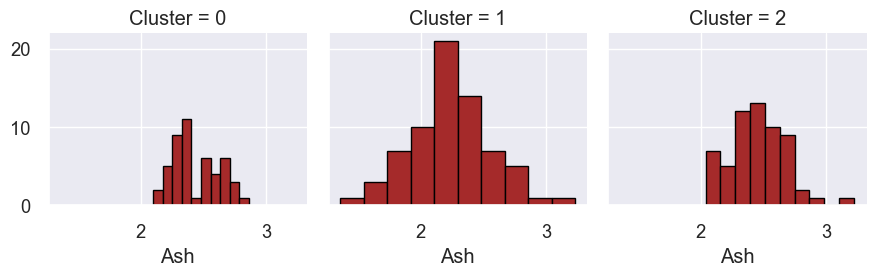

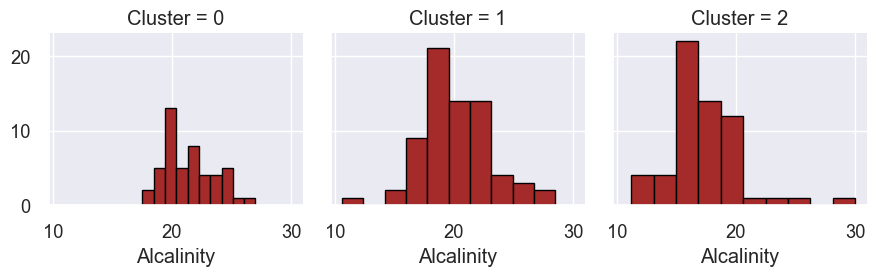

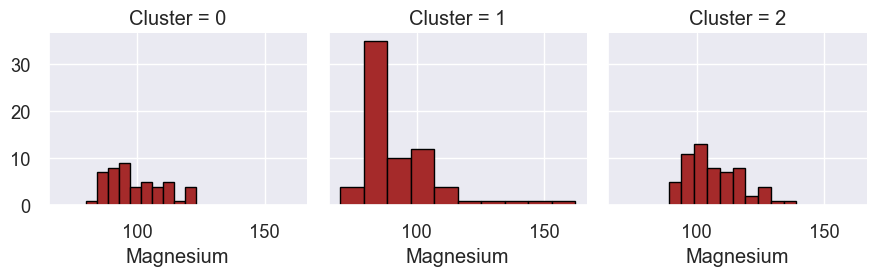

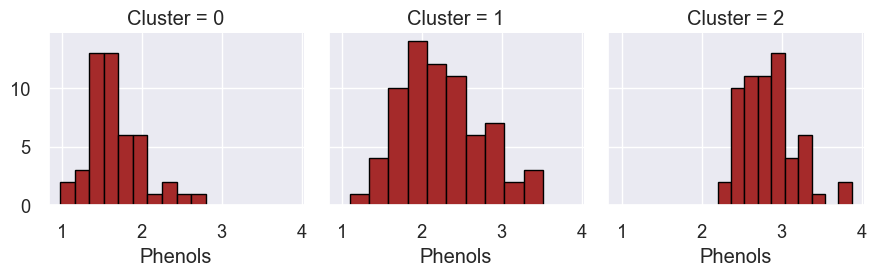

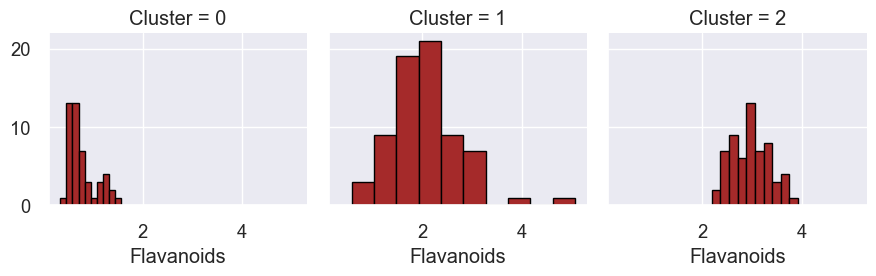

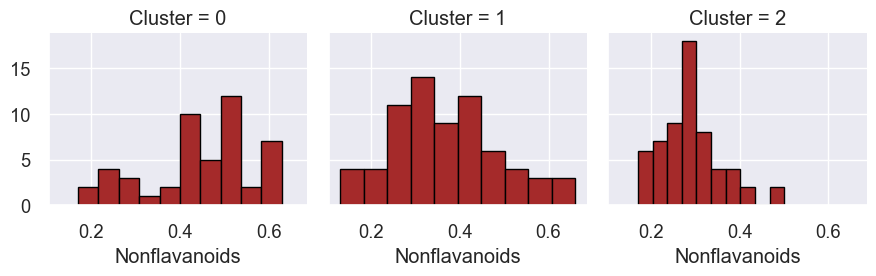

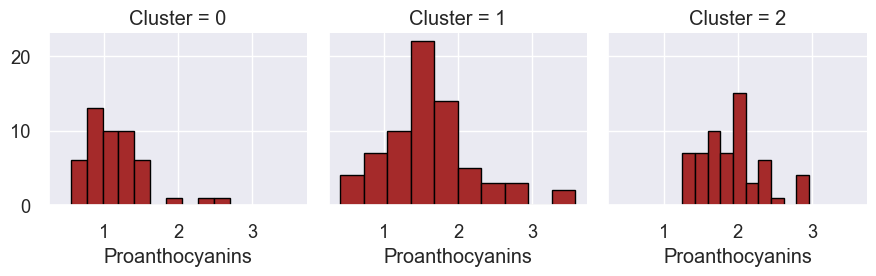

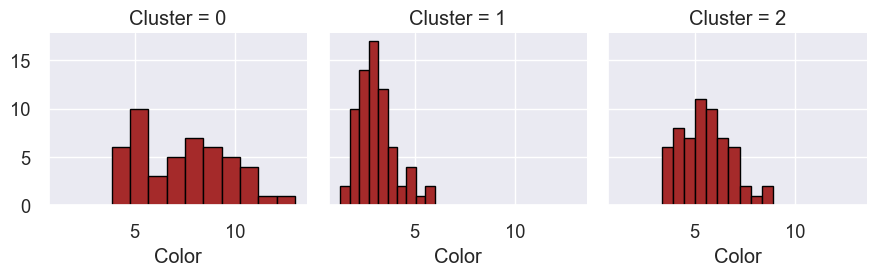

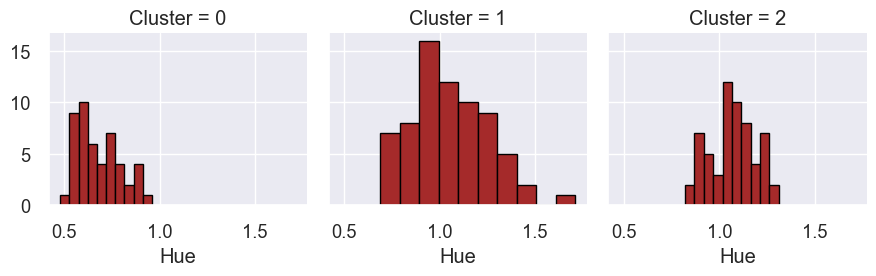

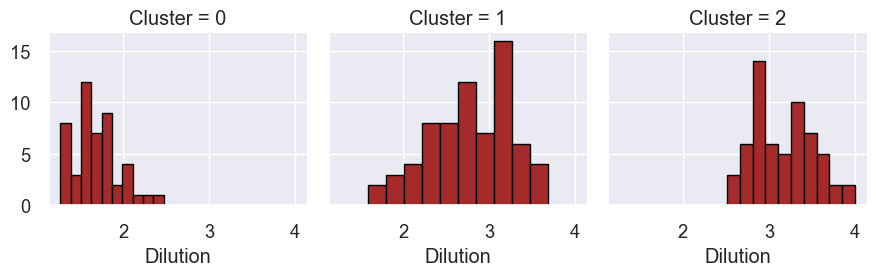

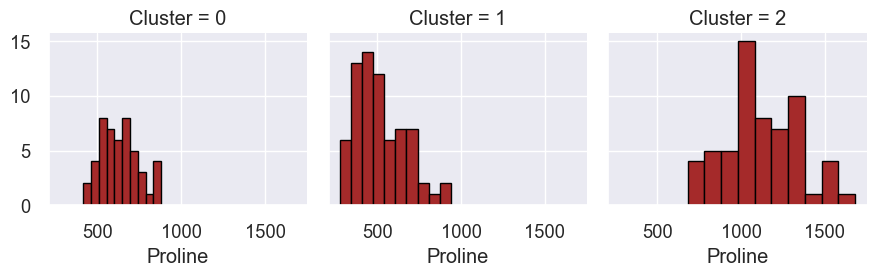

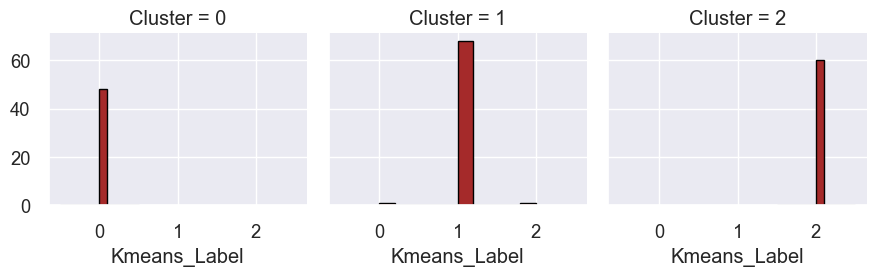

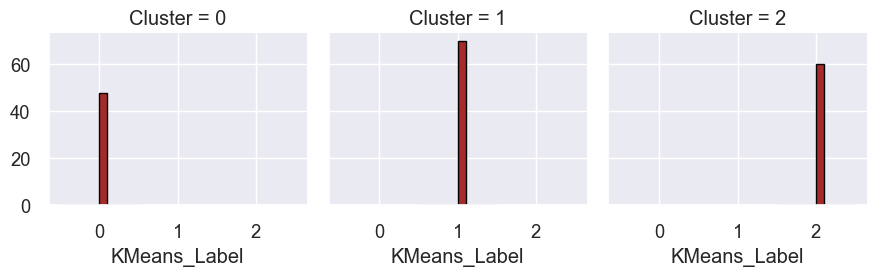

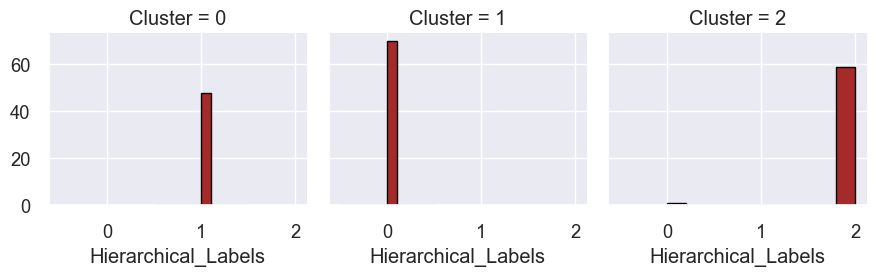

In [98]:
# We can now clearly see the 3 number of clusters formed

    
wine_df2=wine_df.copy()
wine_df2["Cluster"]=model_kmeans.labels_

aux=wine_df2.columns.tolist()
aux[0:len(aux)-1]

sns.set(style="darkgrid",rc={"figure.figsize":(15,10)},font_scale=1.2)
for cluster in aux[0:len(aux)-1]:
    grid=sns.FacetGrid(wine_df2,col="Cluster")
    grid.map(plt.hist,cluster,color="brown",lw=1,edgecolor="black")
    

In [99]:
# Sorting elements based on cluster label assigned and taking average for insights.

cluster1=pd.DataFrame(wine_df2.loc[wine_df2.Cluster==0].mean(),columns=["Cluster1_Avg"])
cluster2=pd.DataFrame(wine_df2.loc[wine_df2.Cluster==1].mean(),columns=["Cluster2_Avg"])
cluster3=pd.DataFrame(wine_df2.loc[wine_df2.Cluster==2].mean(),columns=["Cluster3_Avg"])
avg_df=pd.concat([cluster1,cluster2,cluster3],axis=1)
avg_df

,Cluster1_Avg,Cluster2_Avg,Cluster3_Avg
Type,3.000000,2.000000,1.016667
Alcohol,13.153750,12.268571,13.732167
Malic,3.333750,1.936429,2.005000
Ash,2.437083,2.239714,2.458000
Alcalinity,21.416667,20.098571,17.253333
Magnesium,99.312500,93.914286,106.883333
Phenols,1.678750,2.244000,2.847833
Flavanoids,0.781458,2.069286,2.980833
Nonflavanoids,0.447500,0.365857,0.288667
Proanthocyanins,1.153542,1.625571,1.900333


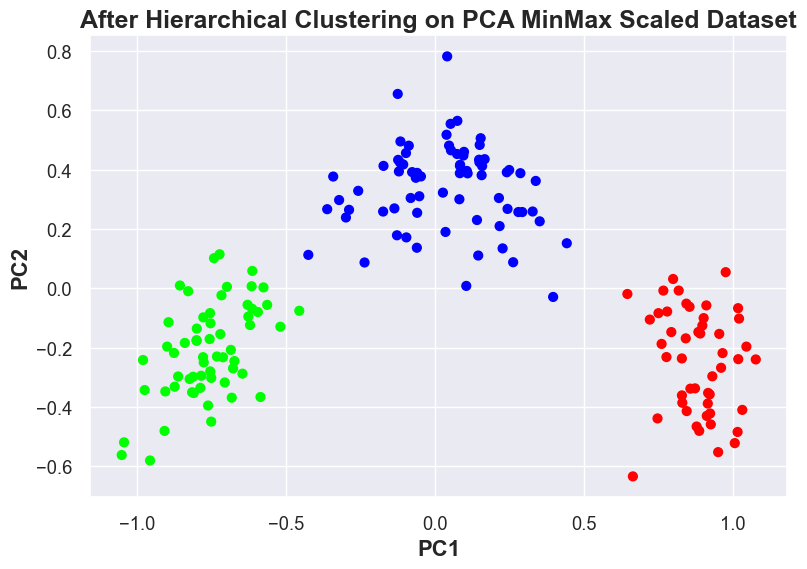

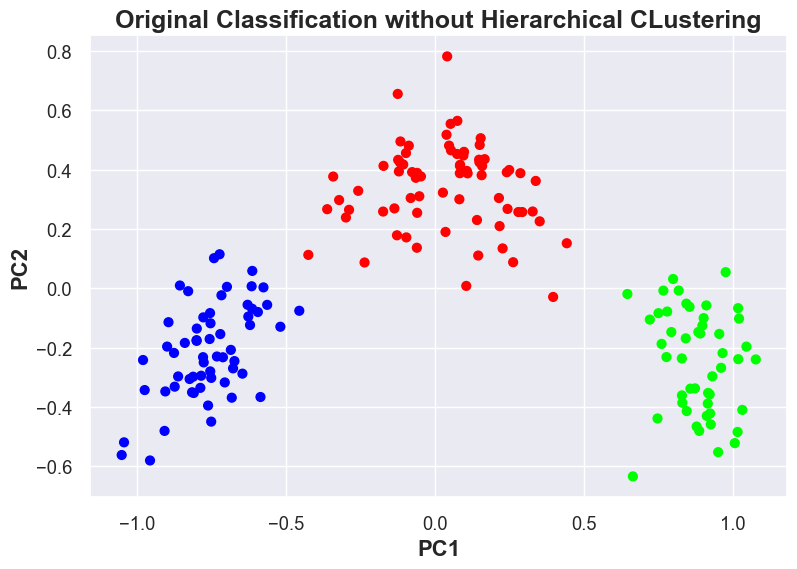

In [100]:
# Comparing Hierarchical Clusters with the Original Classified Dataset using "Type" Feature

plt.figure(figsize=(9,6))
plt.scatter(pca_norm_wine.iloc[:,0], pca_norm_wine.iloc[:,1], c= wine_df['Hierarchical_Labels'], cmap="brg", s=40)
plt.title('After Hierarchical Clustering on PCA MinMax Scaled Dataset',fontweight='bold', fontsize=18)
plt.xlabel('PC1', fontweight='bold', fontsize=16)
plt.ylabel('PC2', fontweight='bold', fontsize=16)
plt.show()

plt.figure(figsize=(9,6))
plt.scatter(pca_norm_wine.iloc[:,0], pca_norm_wine.iloc[:,1], c= wine_df['Type'], cmap="brg", s=40)
plt.title('Original Classification without Hierarchical CLustering', fontweight='bold', fontsize=18)
plt.xlabel('PC1', fontweight='bold', fontsize=16)
plt.ylabel('PC2', fontweight='bold', fontsize=16)
plt.show()

In [101]:
# Group data by Clusters (K=3)

display('After Applying Hierarchical CLustering on  PCA MinMax Scaled Dataset',wine_df.groupby('Hierarchical_Labels').agg(['mean']),'Original Classified Dataset',wine.groupby('ID').agg(['mean']).head())


'After Applying Hierarchical CLustering on  PCA MinMax Scaled Dataset'

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline,Kmeans_Label,KMeans_Label
,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean
Hierarchical_Labels,,,,,,,,,,,,,,,,
0,2.0,12.278732,1.932676,2.244789,20.238028,94.549296,2.258873,2.080845,0.363662,1.630282,3.086620,1.056282,2.785352,519.507042,1.014085,1.014085
1,3.0,13.153750,3.333750,2.437083,21.416667,99.312500,1.678750,0.781458,0.447500,1.153542,7.396250,0.682708,1.683542,629.895833,0.000000,0.000000
2,1.0,13.744746,2.010678,2.455593,17.037288,106.338983,2.840169,2.982373,0.290000,1.899322,5.528305,1.062034,3.157797,1115.711864,2.000000,2.000000


'Original Classified Dataset'

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean
ID,,,,,,,,,,,,,,
1,1.0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
2,1.0,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
3,1.0,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
4,1.0,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
5,1.0,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0


#  The 3 clusters has been clustered but has a negliglable amount of difference compared to original classified Feature and we have perfectly clustered the data into Three Types as compared to classification of three types of Wine was indicated in the Original Dataset in 'Type' Column